In [1]:
from Restructure import *
from new_K_seismicity_rate3 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from AVN import *
import glob
from datetime import datetime
import pandas as pd
import scipy.io as scp

# Clusters from HDBSCAN:

In [2]:
#path_to_df0 = "/Users/claire/Desktop/new_all_run_files_for_etas/catalog_all/"
path_to_df0 = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/catalog_all/"

####Raw data:
df0 = pd.read_csv(path_to_df0+'raw_data_modified_version.csv')
###Structure : t, x, y, z, m, x_km, y_km

###Clusters from dbscan:
v0_n50_d0_3 = scp.loadmat("dbscan_data/v0_d03km_n50_every1.mat")["clusters"].reshape(-1) ##au moins 50 séismes à < 200 m, v = 0km/d : 1 séisme sur 1 ou 5 comme vertex

###Restructure:
def restructure_dbscan(dbscan) :
    
    new_dbscan = []
    for i in range(0, len(dbscan)):
        new_dbscan.append(int(dbscan[i]))
        
    new_dbscan = np.reshape(new_dbscan, -1)
    
    return new_dbscan

v0_n50_d0_3 = restructure_dbscan(v0_n50_d0_3)

df0["v0_n50_d0_3"] = v0_n50_d0_3

###Take into account m0:
m0 = -5
df0 = df0[df0.m >= m0]


###Remove all rows with a magnitude equal to a nan value:
df0 = df0.dropna()

df0.index = np.arange(0, len(df0))

df0

t         x         y       z         m         x_km  \
0         0.004465  42.99118  12.92042   4.107  0.547416  4780.401106   
1         0.024991  42.30519  13.68531   6.154  0.964305  4704.122499   
2         0.028414  43.52994  12.65680  14.826  0.025395  4840.308485   
3         0.030136  43.16713  12.99694   8.917 -0.127835  4799.965854   
4         0.043938  43.31555  12.55297   3.274 -0.889339  4816.469405   
...            ...       ...       ...     ...       ...          ...   
894438  365.996726  42.81393  13.10829   7.216 -0.325824  4760.691806   
894439  365.997166  42.80558  13.14988   3.126  0.304970  4759.763328   
894440  365.997419  43.00835  13.14668   1.336 -0.183670  4782.310323   
894441  365.999614  42.66073  13.21744   4.262 -0.273458  4743.656743   
894442  365.999712  43.06204  13.07507   3.463 -0.880715  4788.280379   

               y_km  v0_n50_d0_3  
0       1050.875824            2  
1       1125.431260            0  
2       1020.365169            0  
3       1054.068313            0  
4       1015.584715            0  
...             ...          ...  
894438  1069.225754          233  
894439  1072.763006            0  
894440  1068.979802          225  
894441  1080.795874            0  
894442  1062.227310            0  

[894443 rows x 8 columns]

In [3]:
###Define AVN MS:
A, V, N, df_AVN = AVN(df0)

df_AVN

t         x         y      z         m         x_km  \
621      9.067054  42.71446  13.24279  3.276  6.046692  4749.631246   
184899  72.804244  42.91094  13.13936  2.605  5.576763  4771.478826   
201811  76.277989  42.83603  13.12131  6.104  6.074127  4763.149214   

               y_km  v0_n50_d0_3  
621     1081.932511          0.0  
184899  1070.077358          0.0  
201811  1069.905228        233.0

In [4]:
###Define colors code for plots:
from matplotlib import cm

##Get colors : 
cmap_name1 = cm.get_cmap('tab20', 20)
cmap_name2 = cm.get_cmap('tab20b', 20)
cmap_name3 = cm.get_cmap('tab20c', 20)
cmap_name4 = cm.get_cmap('tab10', 10)
cmap_name5 = cm.get_cmap('Set3', 12)

cmap1 = cmap_name1(np.linspace(0, 1, 20))
cmap2 = cmap_name2(np.linspace(0, 1, 20))
cmap3 = cmap_name3(np.linspace(0, 1, 20))
cmap4 = cmap_name4(np.linspace(0, 1, 10))
cmap5 = cmap_name5(np.linspace(0, 1, 12))

cmap = np.vstack([cmap1, cmap2, cmap3, cmap4, cmap5, 
                  cmap1, cmap2, cmap3, cmap4, cmap5, 
                  cmap1, cmap2, cmap3, cmap4, cmap5,
                  cmap1, cmap2, cmap3, cmap4, cmap5,
                  cmap1, cmap2, cmap3, cmap4, cmap5])
print(len(cmap))

410


# Inversion (new_all_run_files_for_etas):

> run_etas_v0_d03_n50_every5_1_100.py

> run_etas_v0_d03_n50_every5_100_200.py

> run_etas_v0_d03_n50_every5_200_300.py

> run_etas_v0_d03_n50_every5_300_end.py


# Output files obtained:

## New analysis of swarms detections with correct L0 value: 

In [8]:
get_cluster_num_ = get_cluster_num ##ici on a tourné 1 fois avec tout puis pour gg en temps, on a repris juste
##les dbscan clusters qui présentent au moins 1 swarms...

1.0 83 312


/home/xianglo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


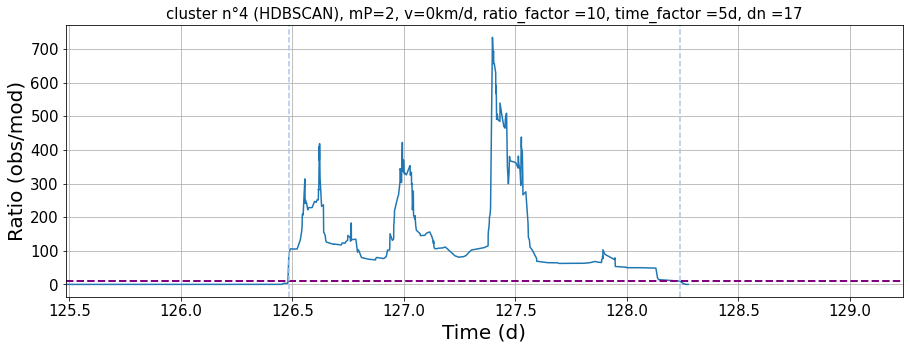

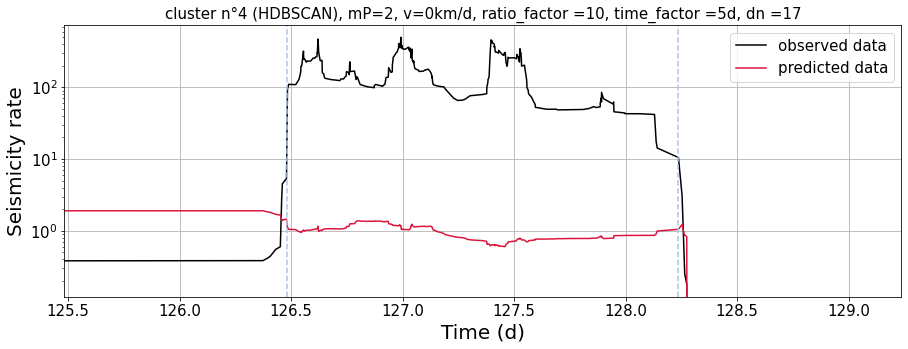

1.0 445 611


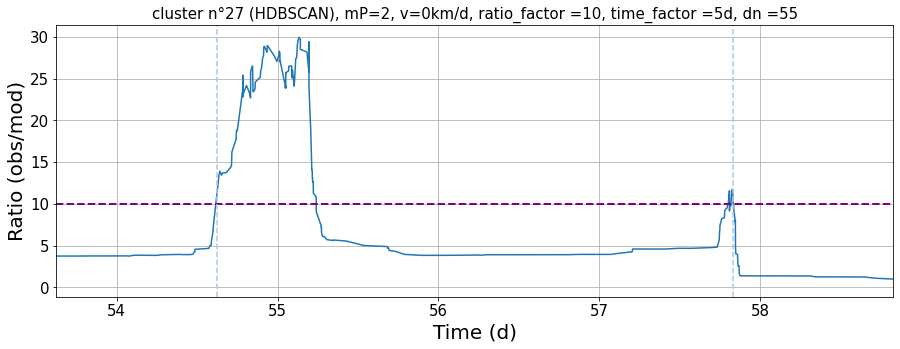

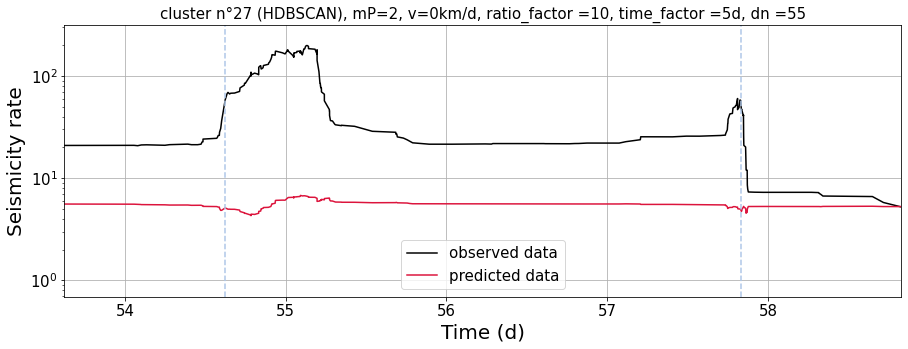

1.0 6 93


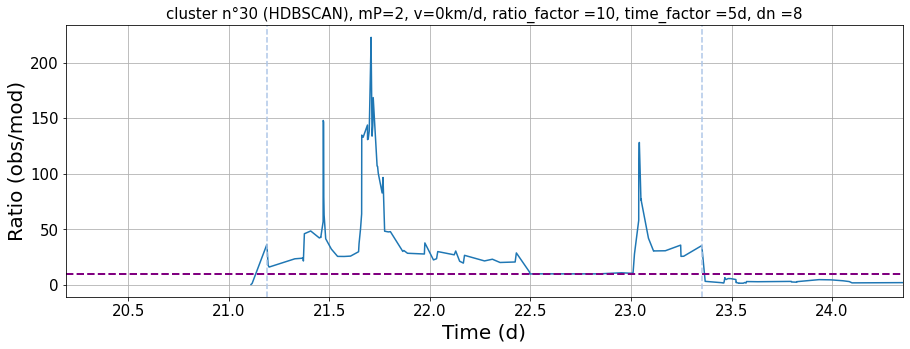

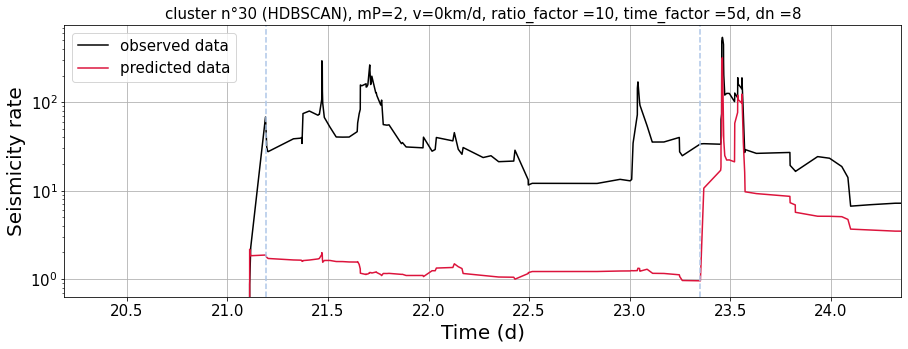

1.0 16 195


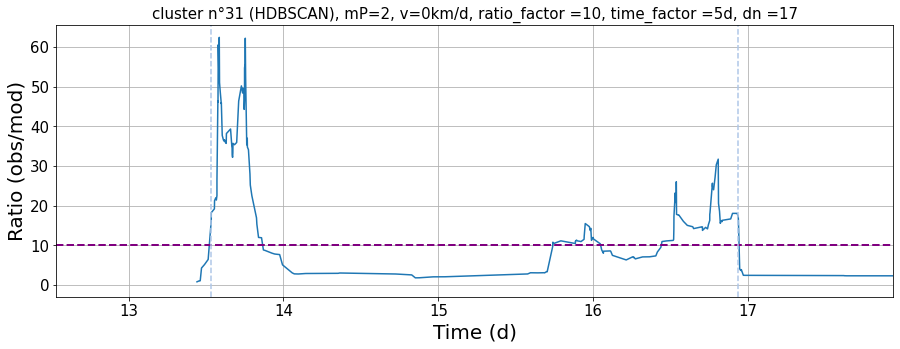

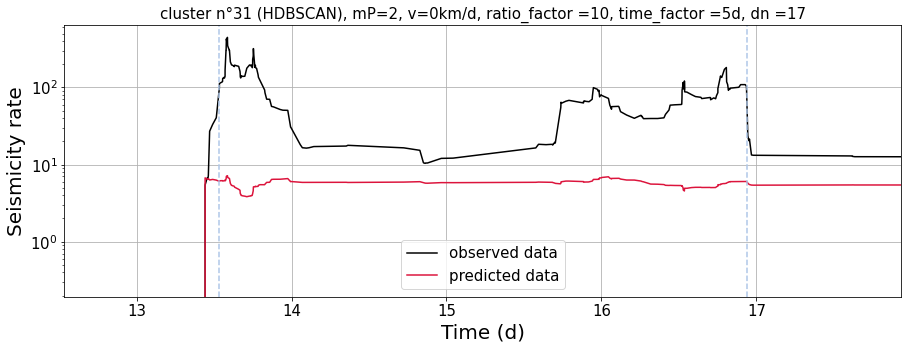

1.0 10 111


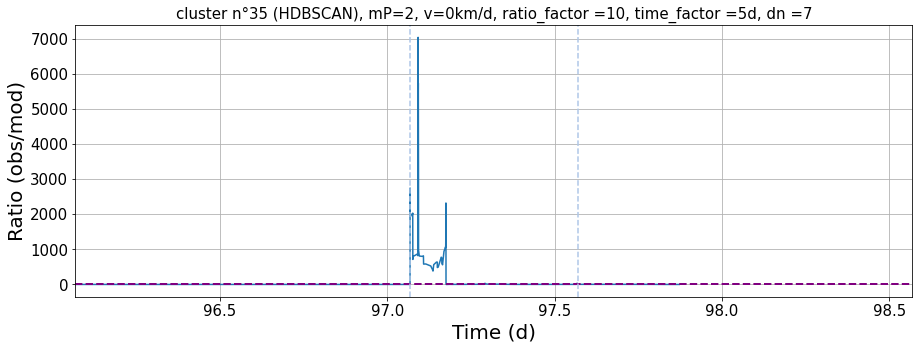

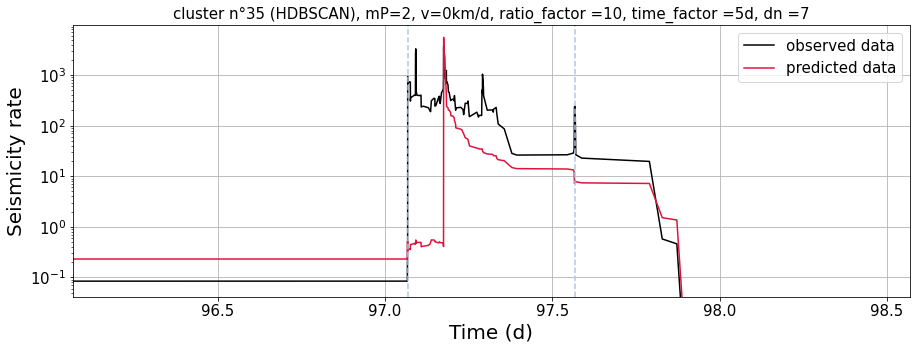

2.0 15 87


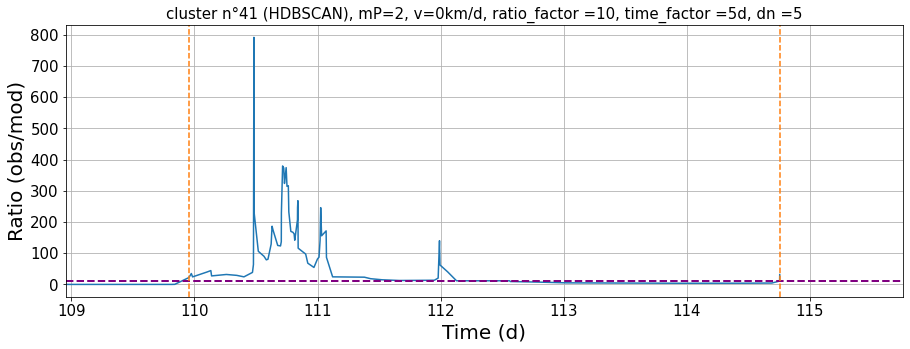

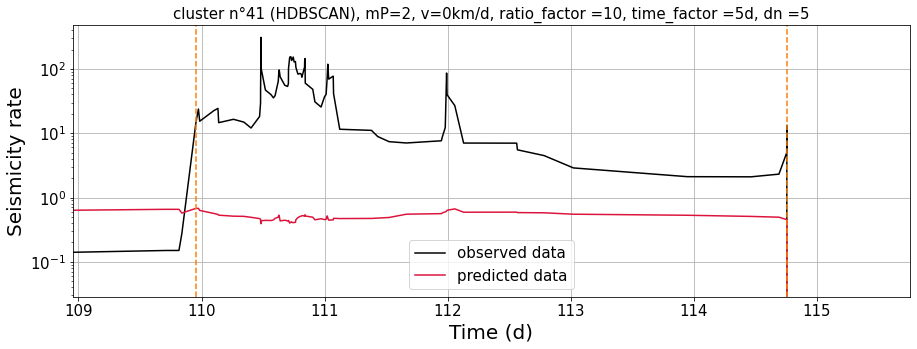

1.0 54 144


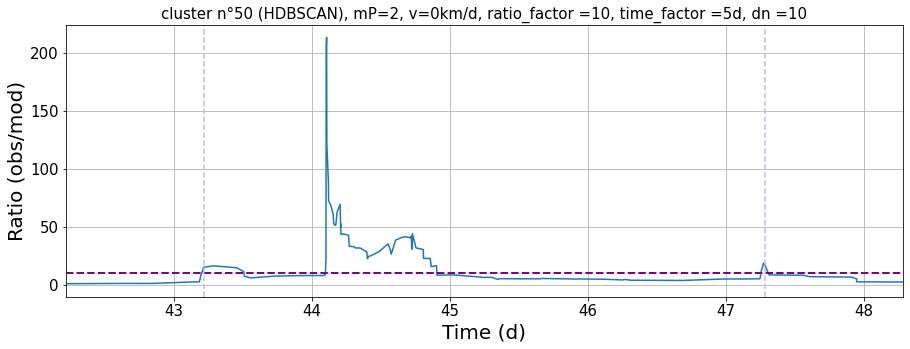

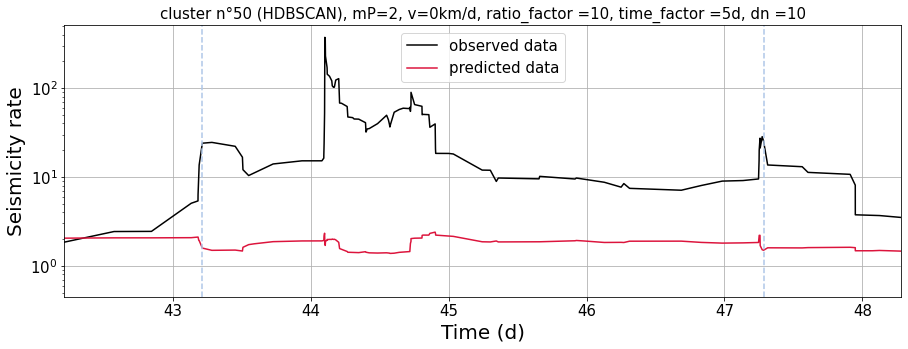

1.0 16 82


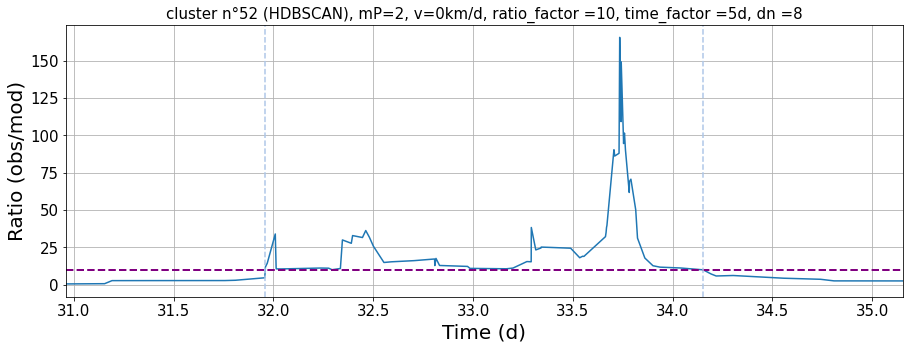

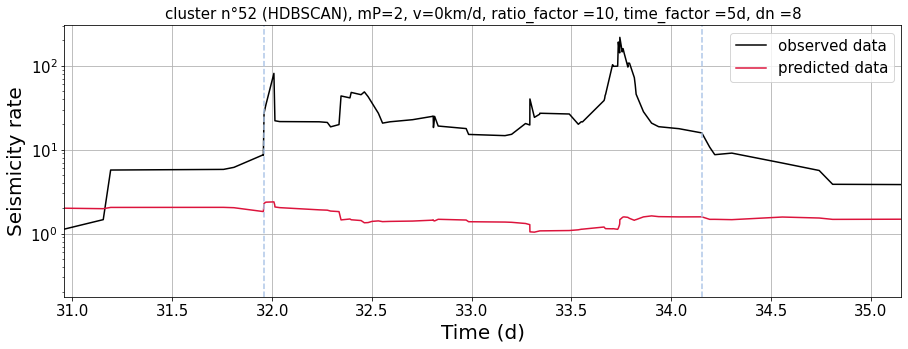

1.0 1454 1705


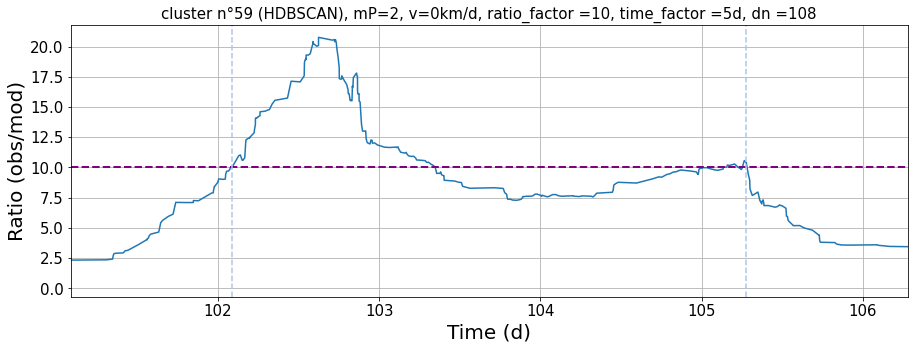

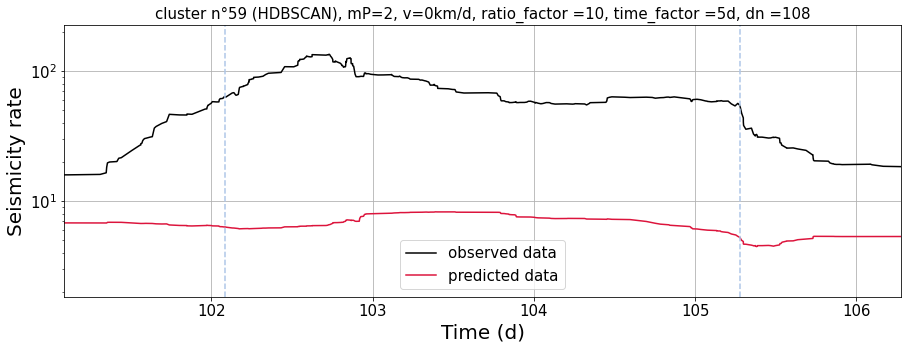

3.0 530 601


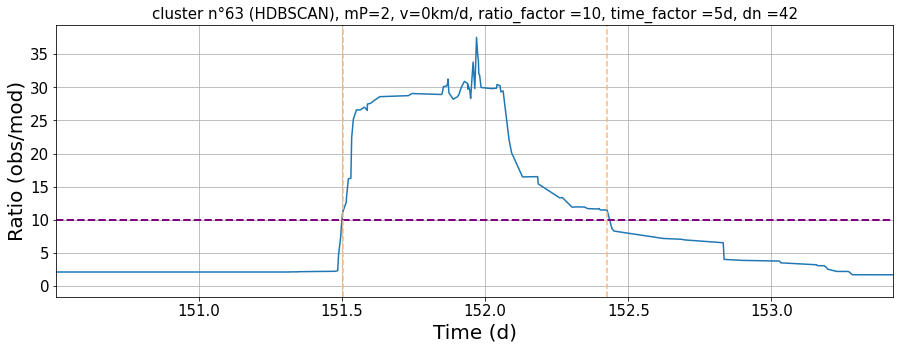

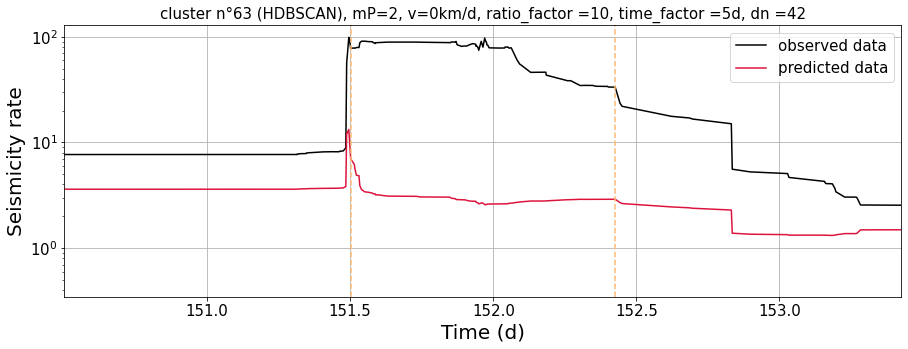

1.0 7 76


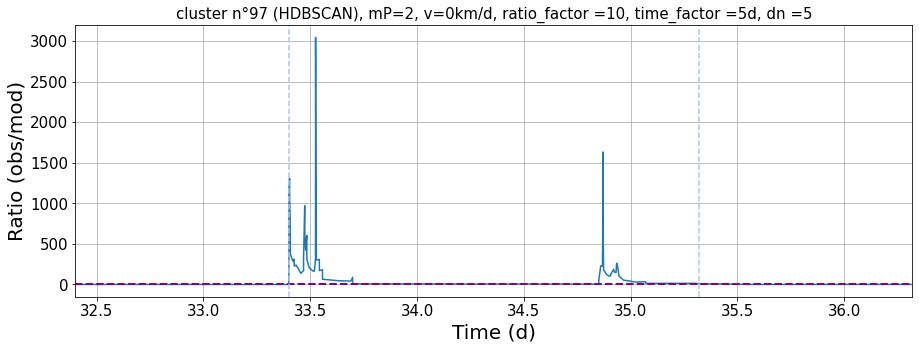

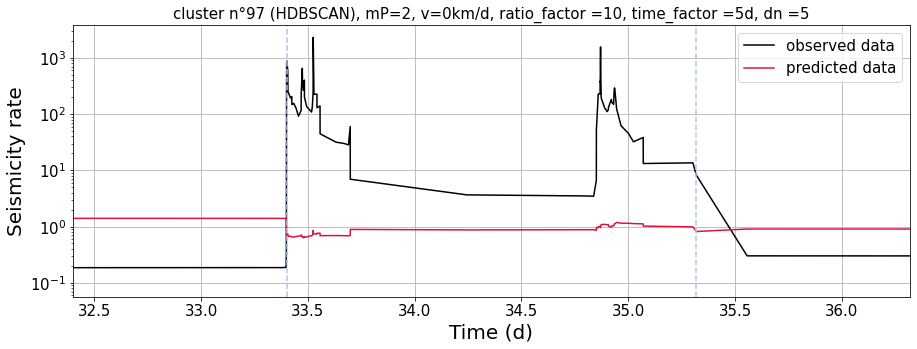

2.0 2902 3017


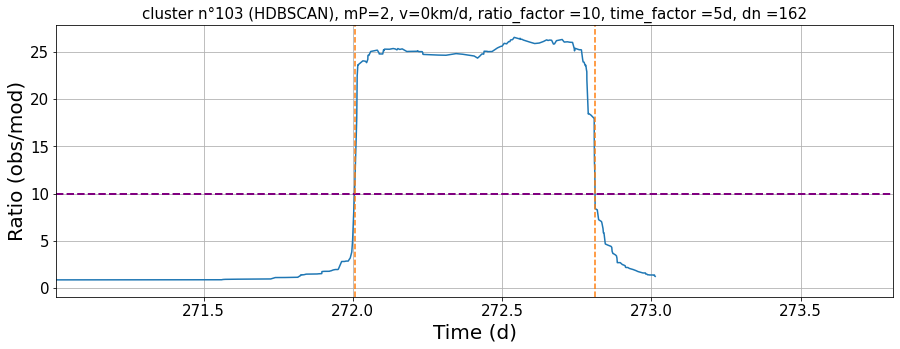

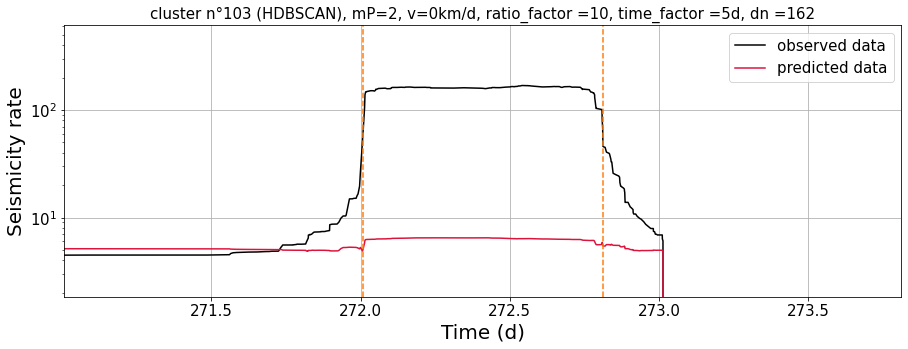

1.0 431 484


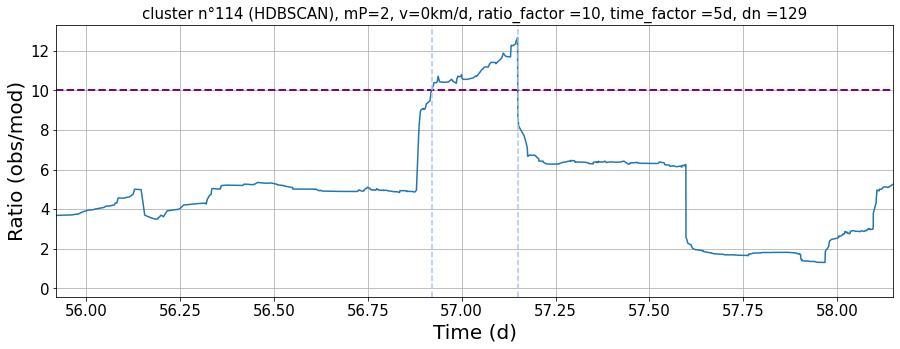

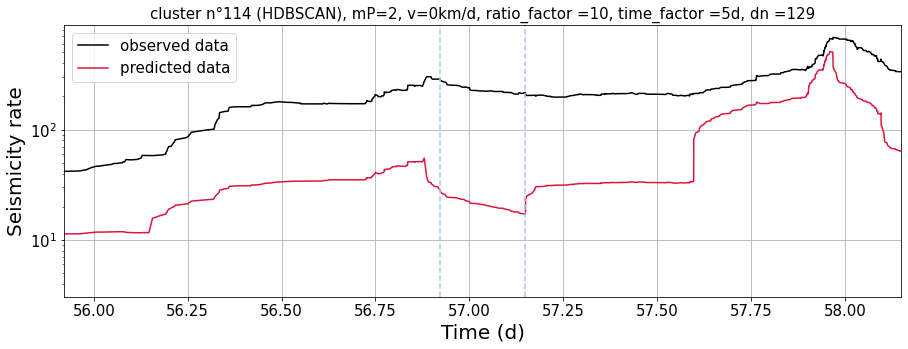

1.0 7 167


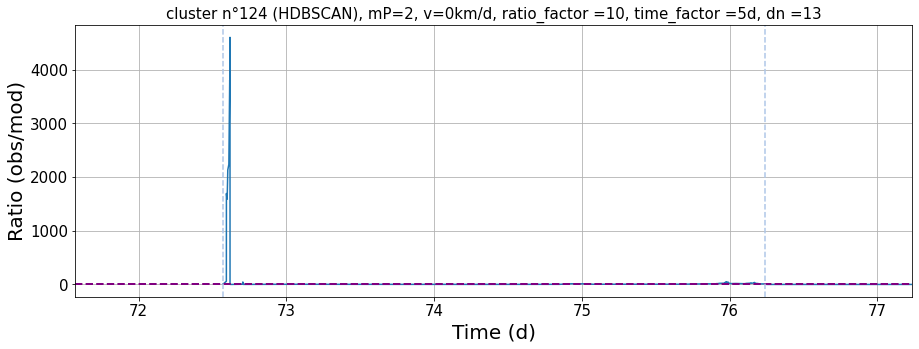

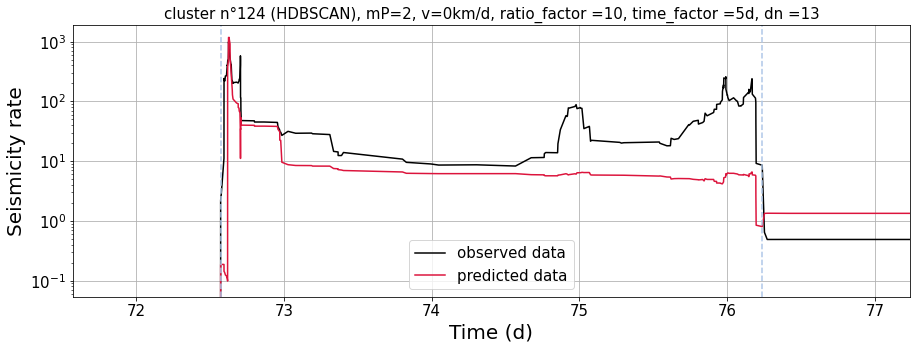

2.0 196 342


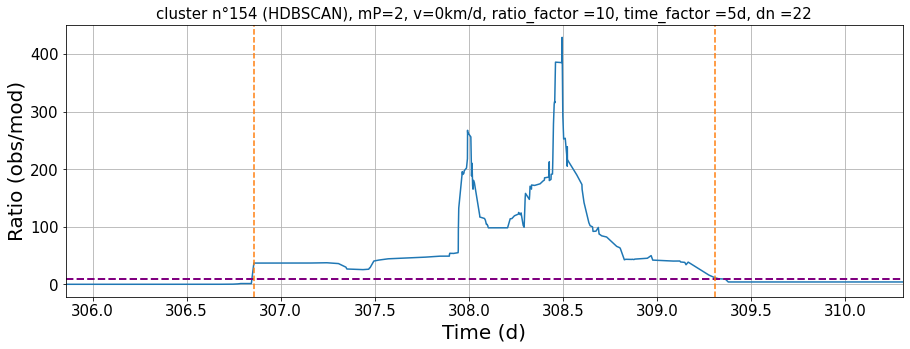

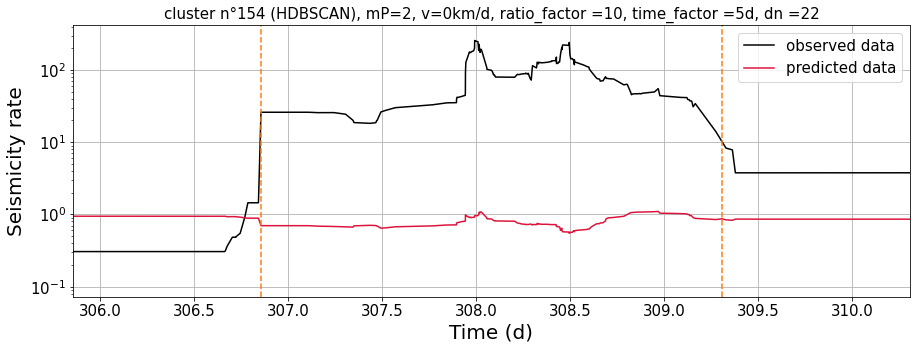

1.0 7 116


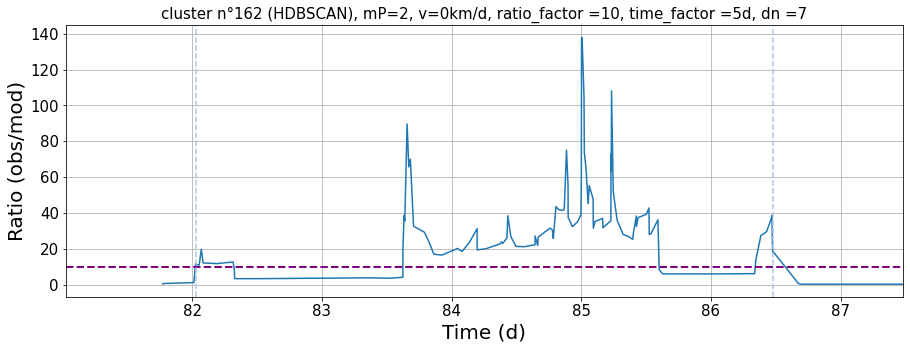

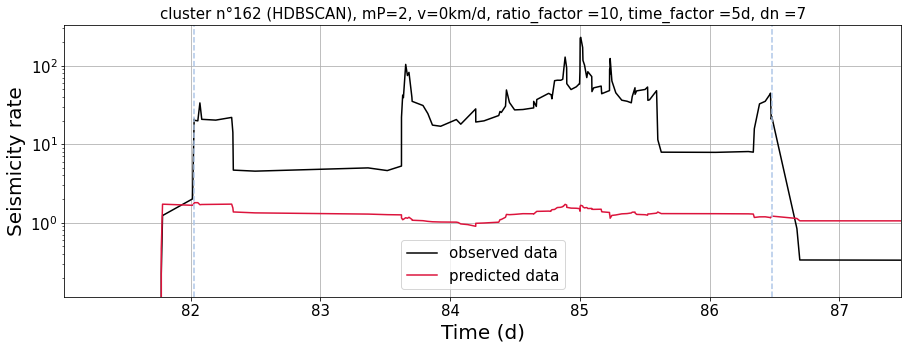

1.0 148 341


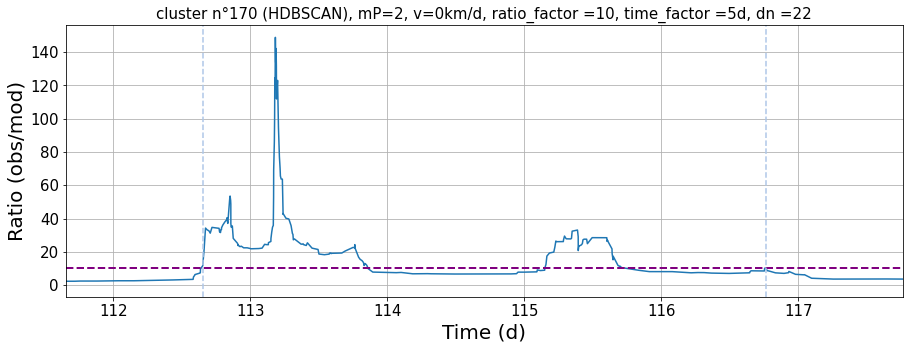

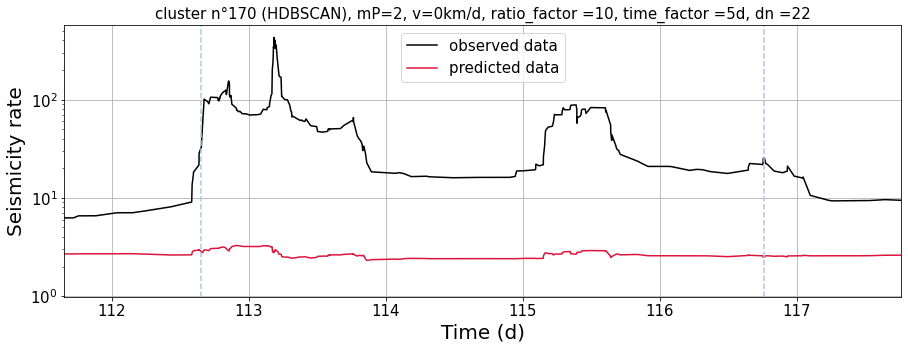

1.0 29 553


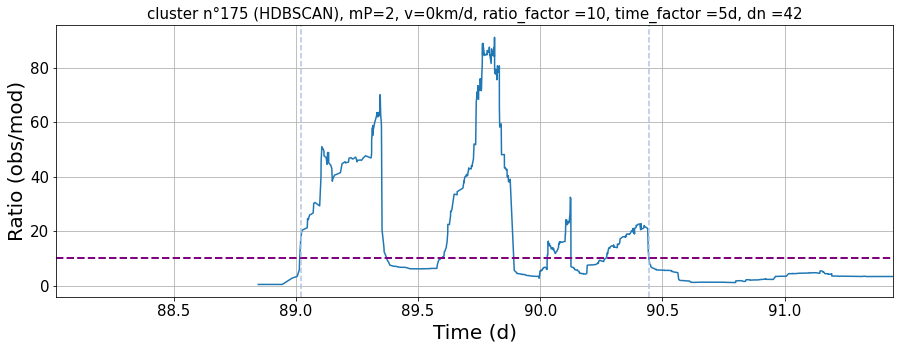

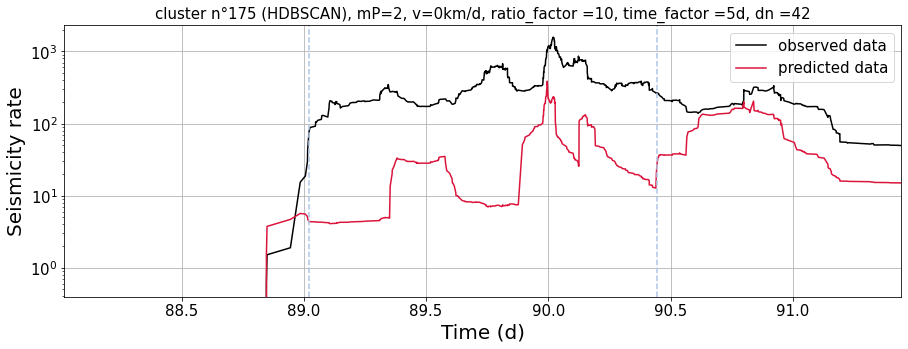

1.0 317 1327


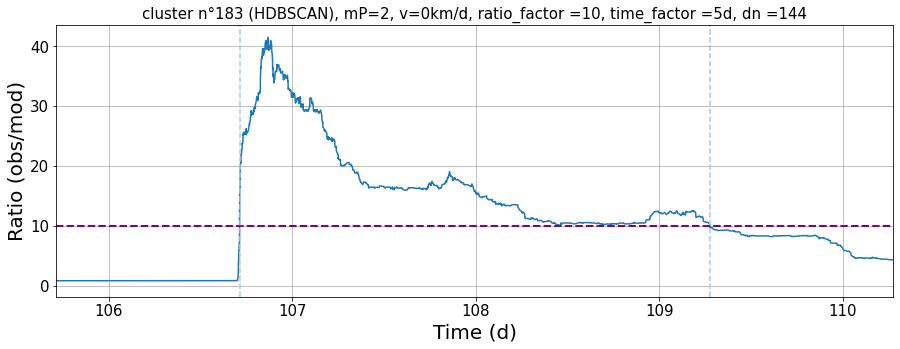

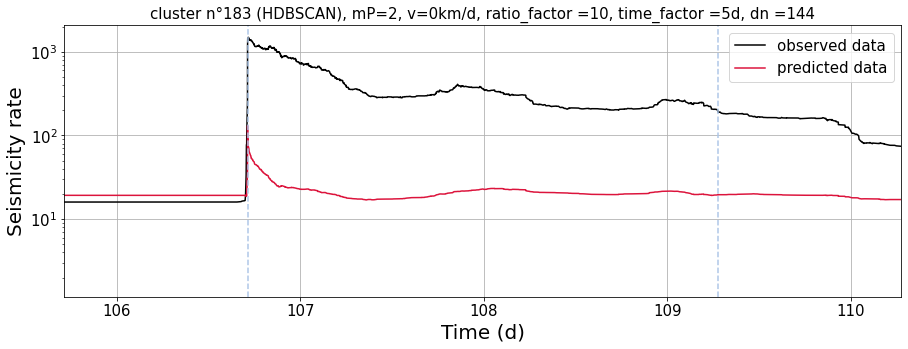

1.0 2243 2707


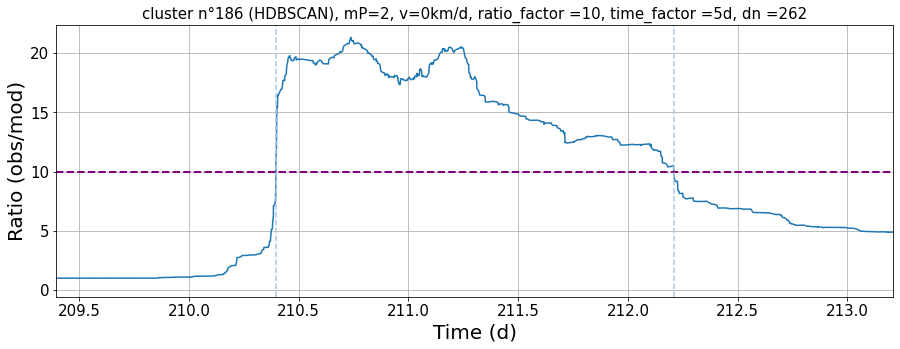

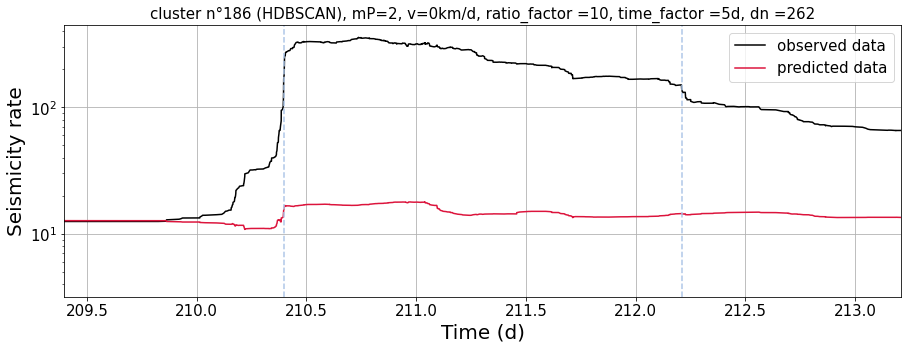

1.0 183 284
2.0 322 378


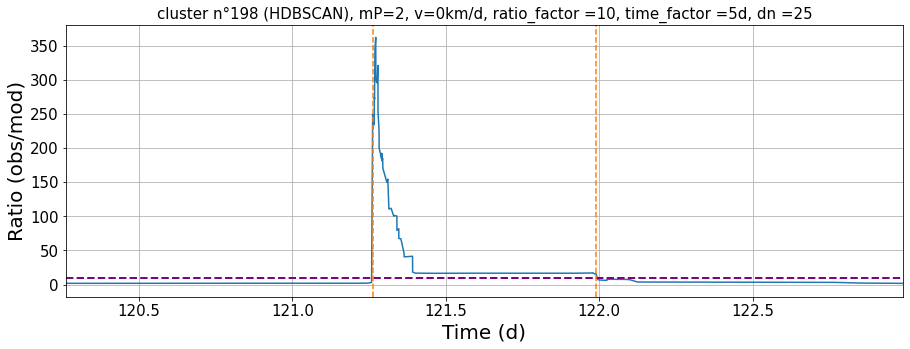

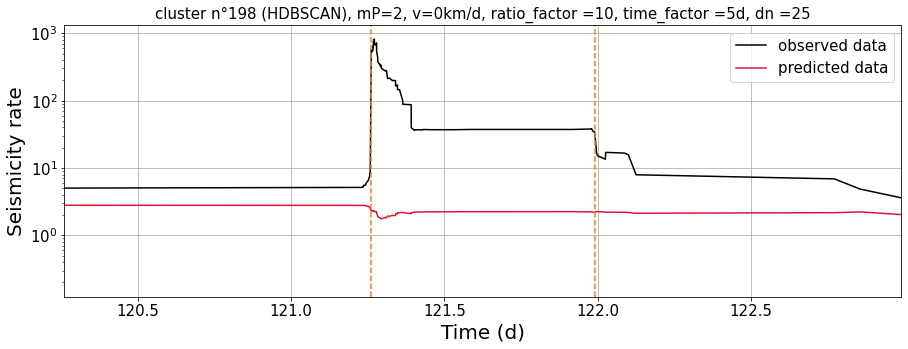

1.0 183 284
2.0 322 378


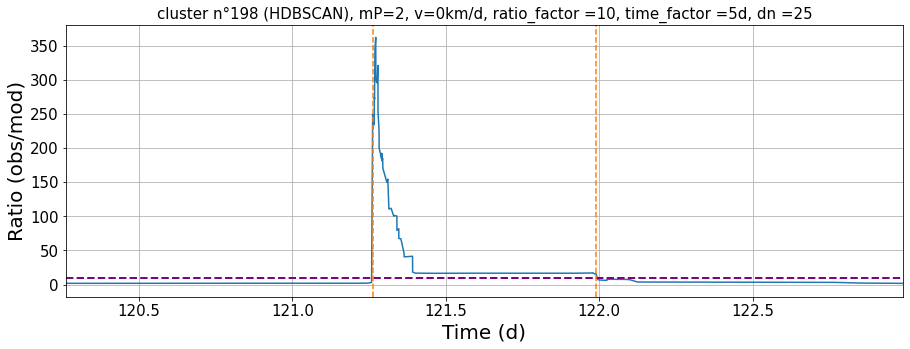

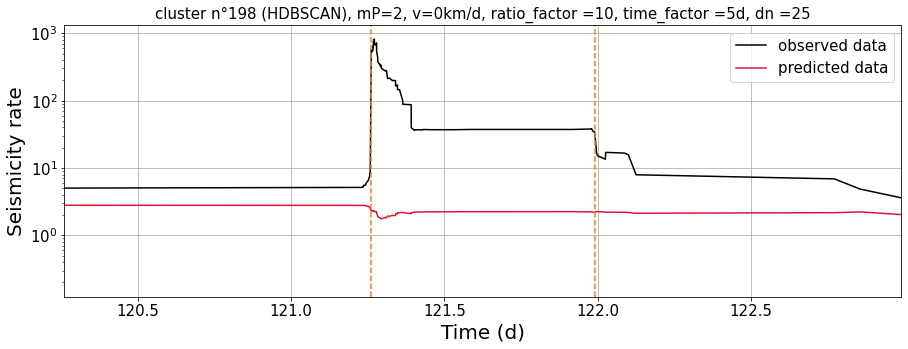

1.0 183 284
2.0 322 378


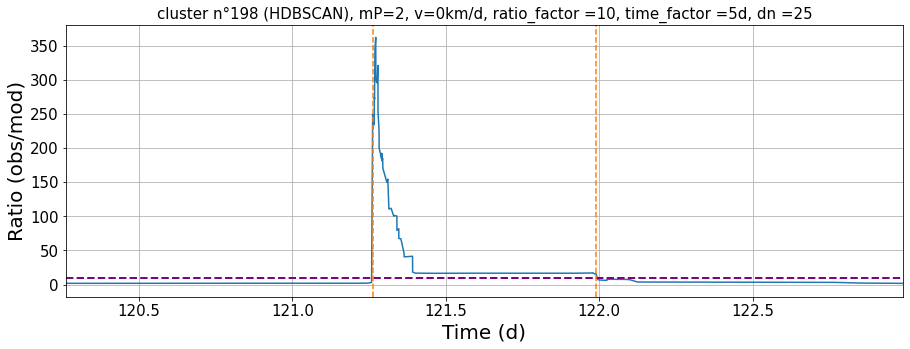

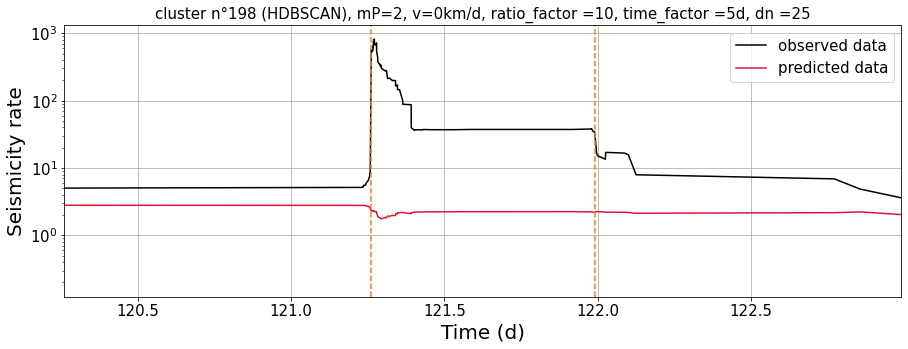

1.0 183 284
2.0 322 378


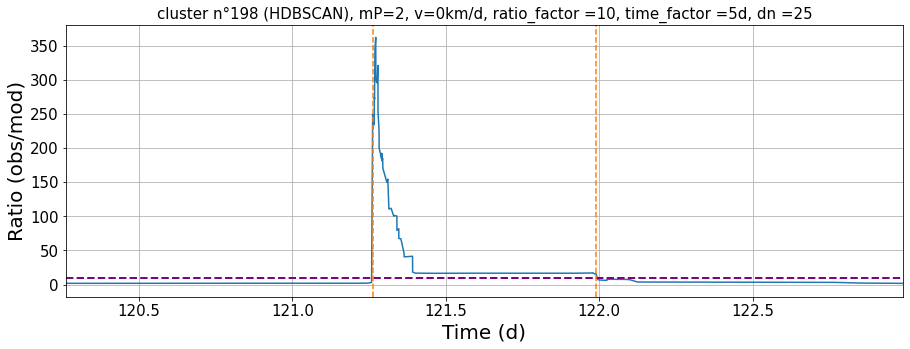

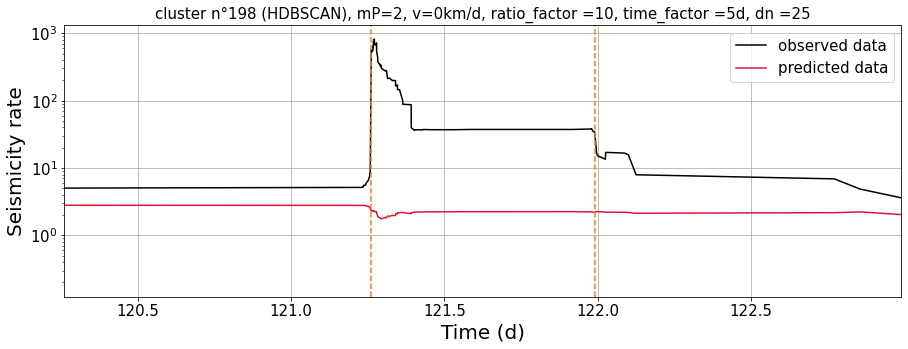

1.0 13 146


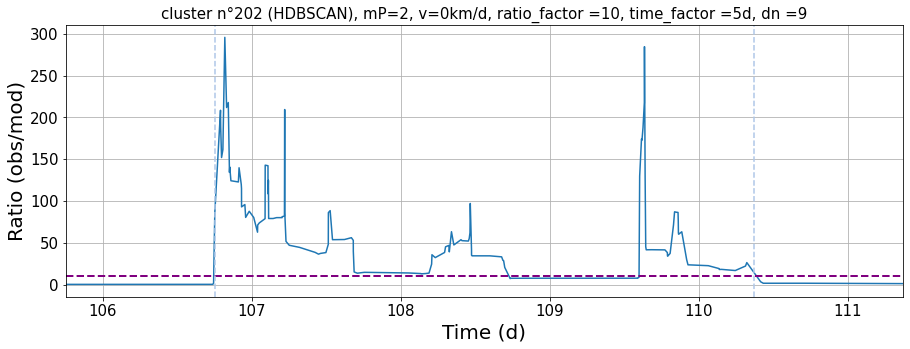

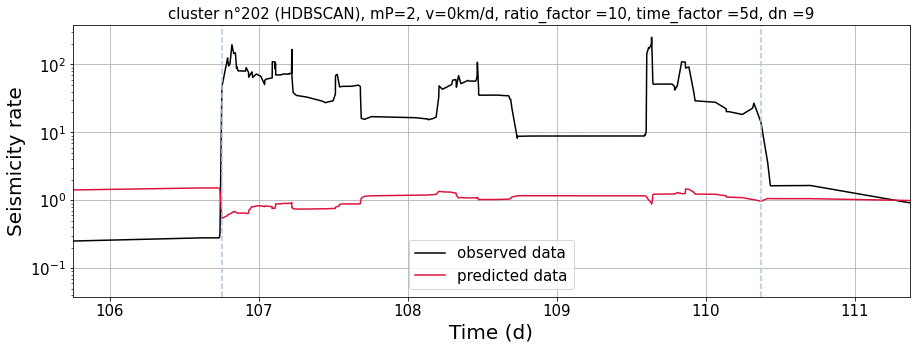

1.0 13 215


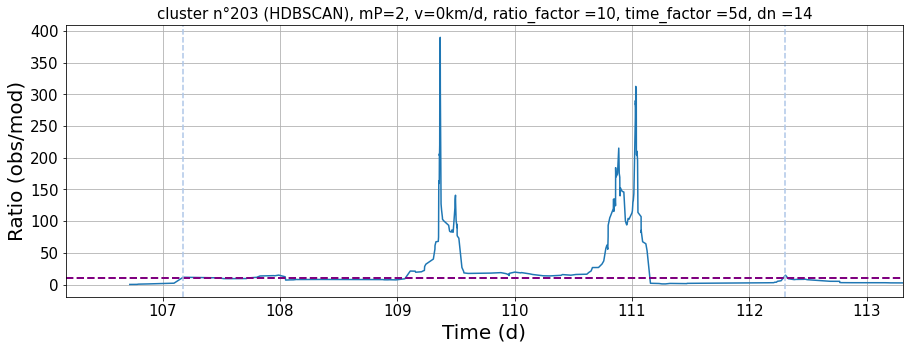

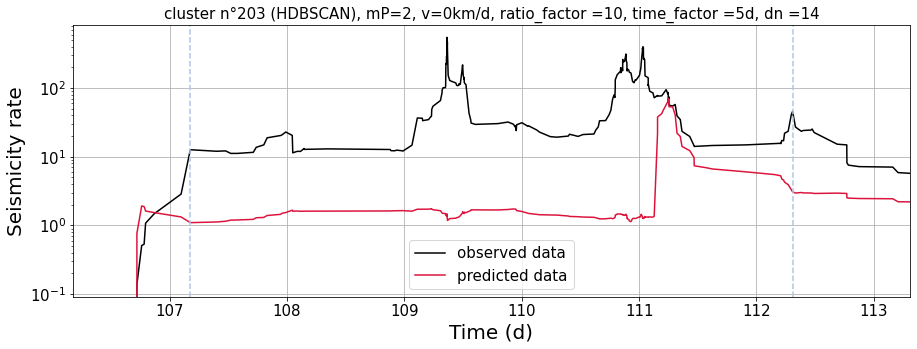

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


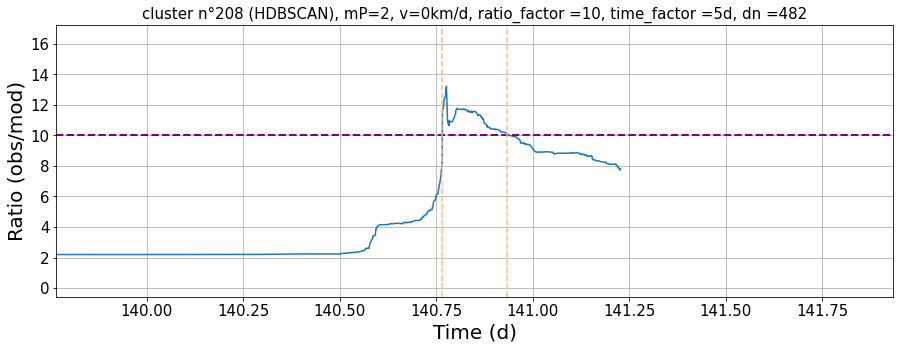

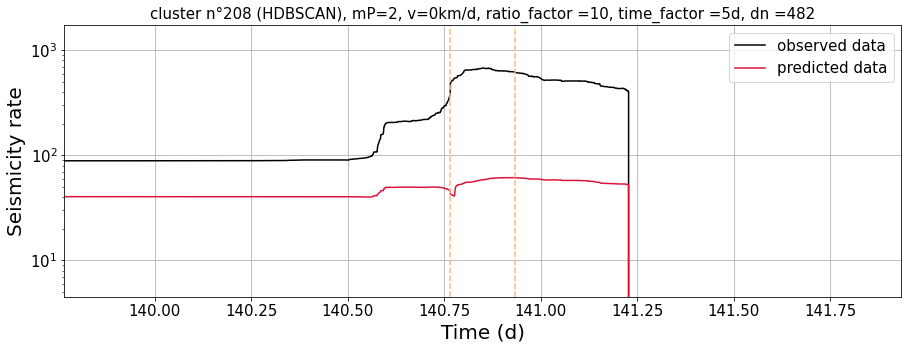

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


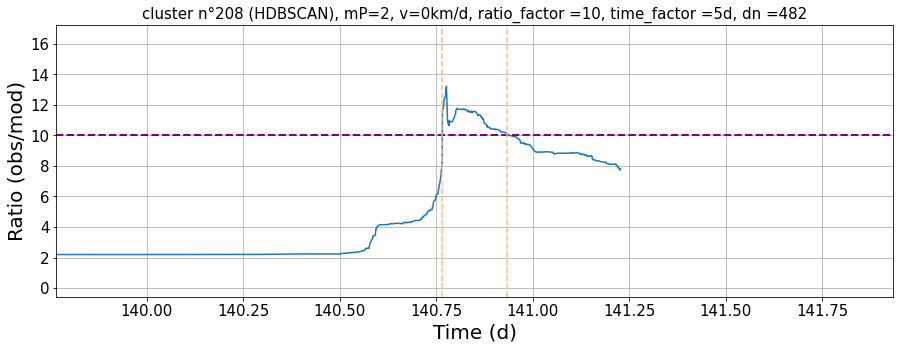

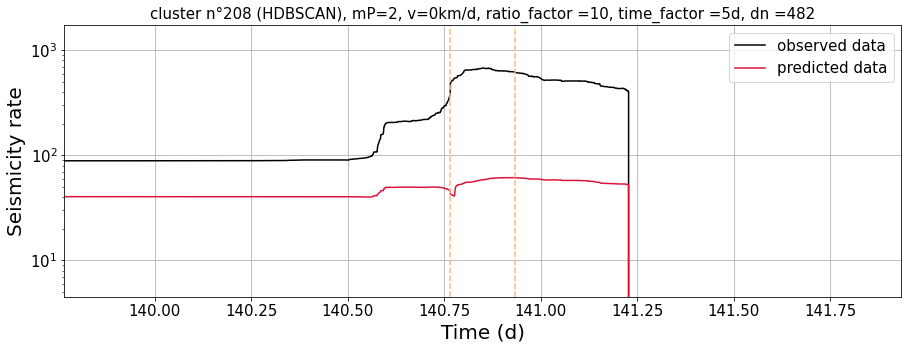

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


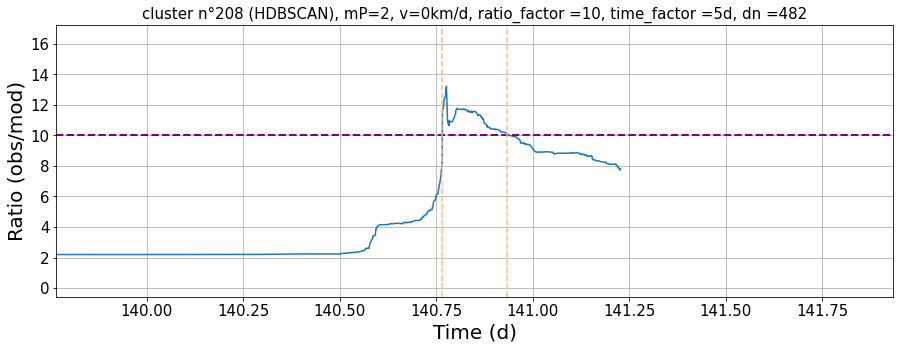

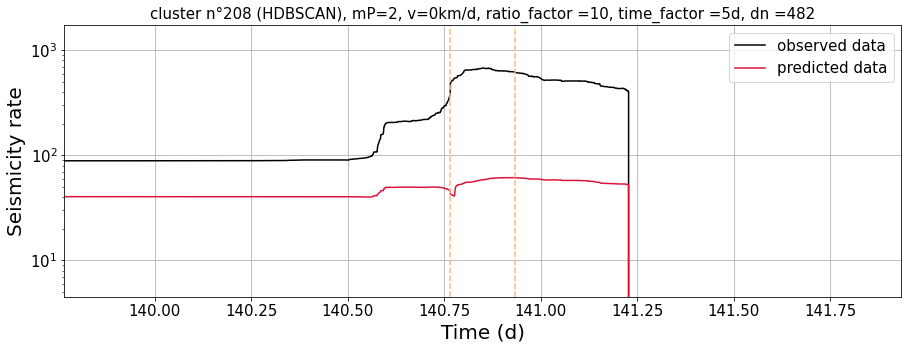

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


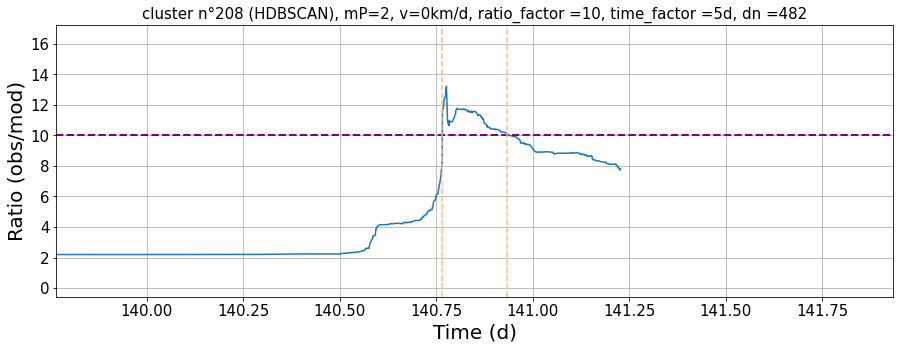

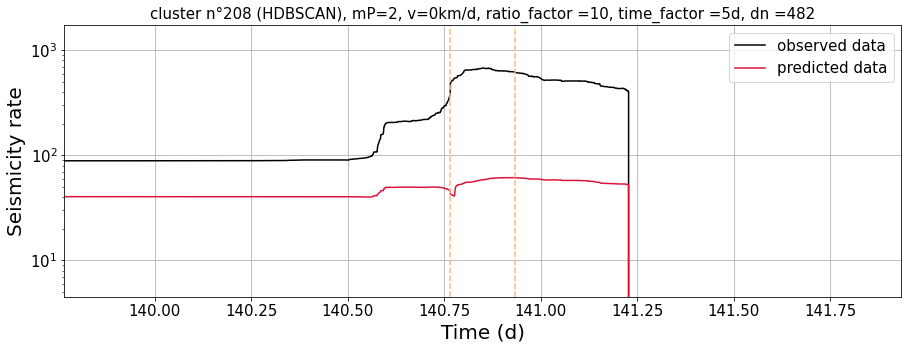

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


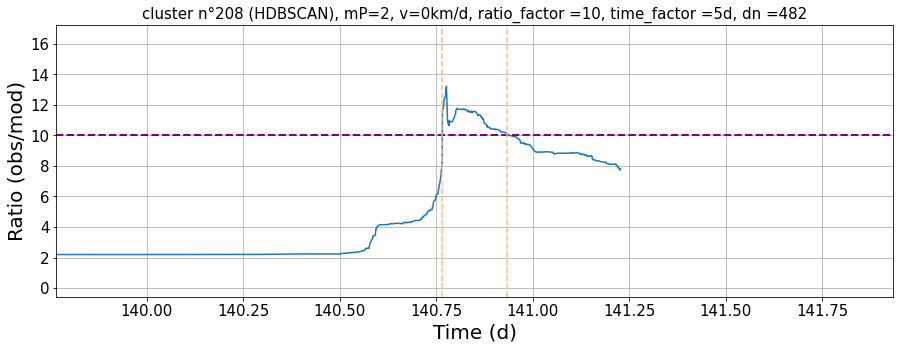

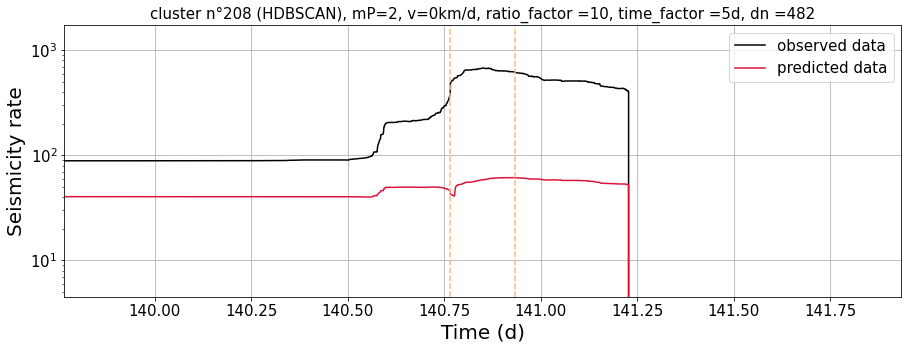

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


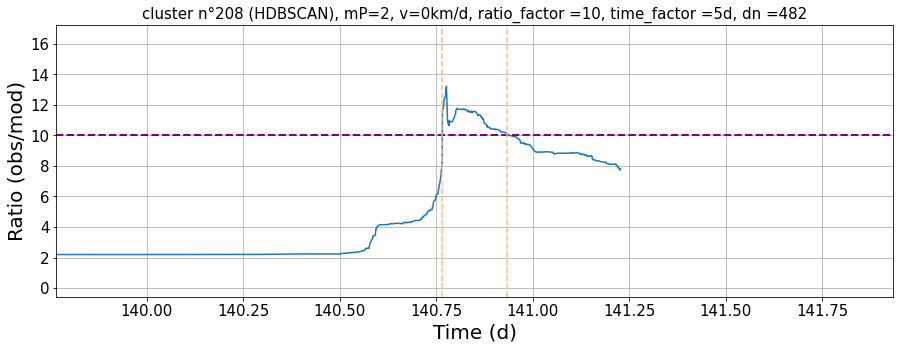

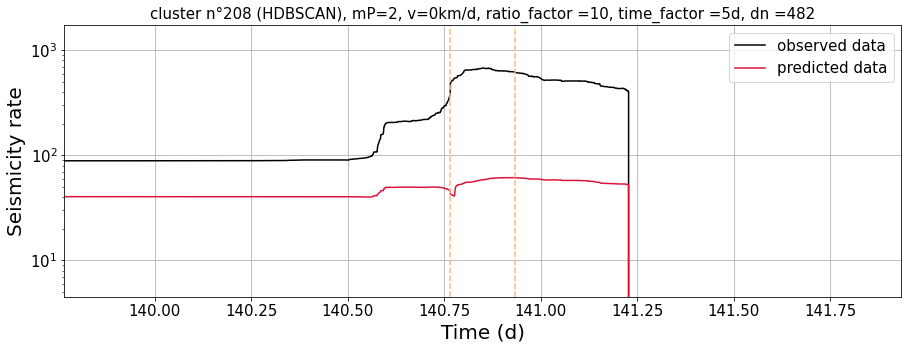

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


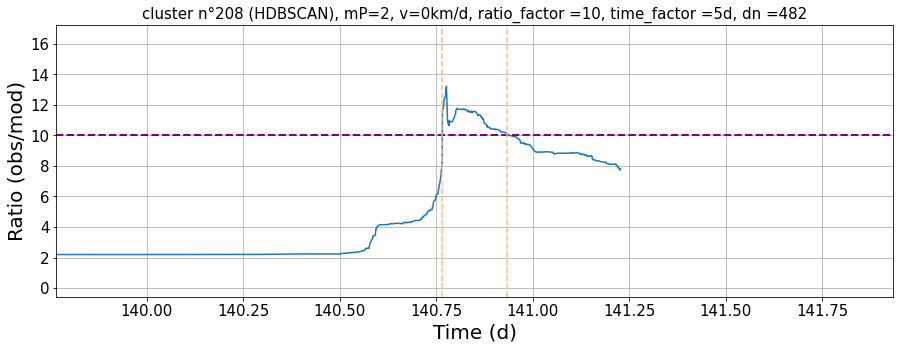

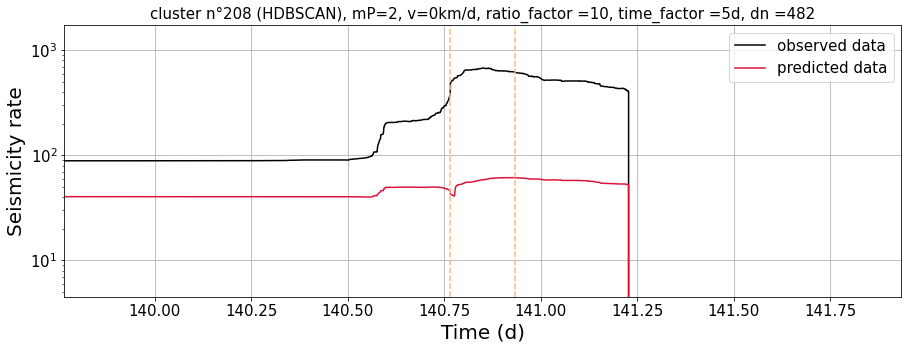

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


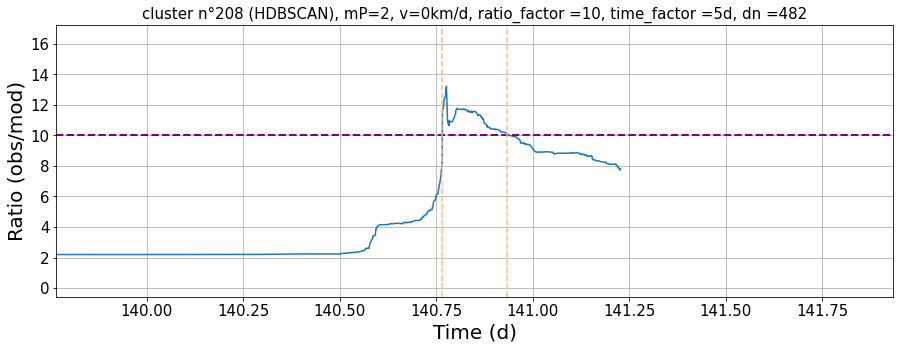

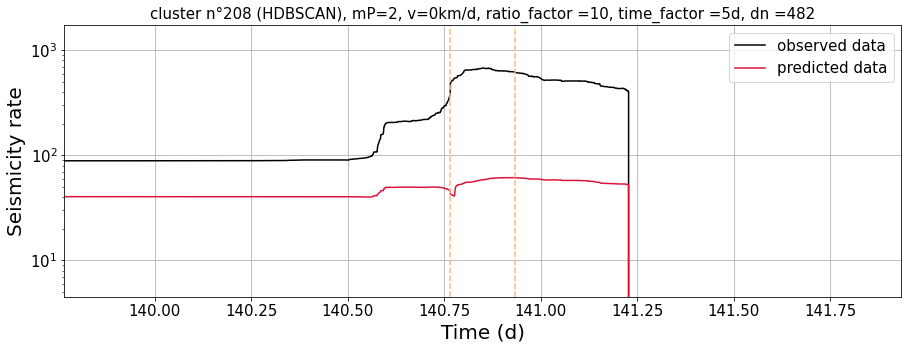

1.0 1399 3563
2.0 6035 6211
3.0 8877 8984


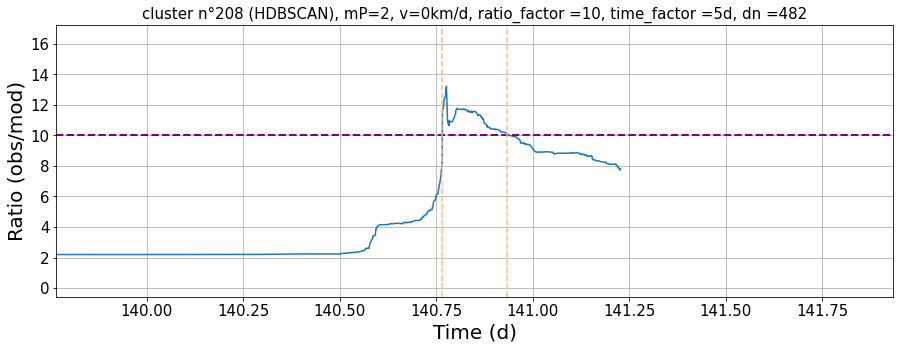

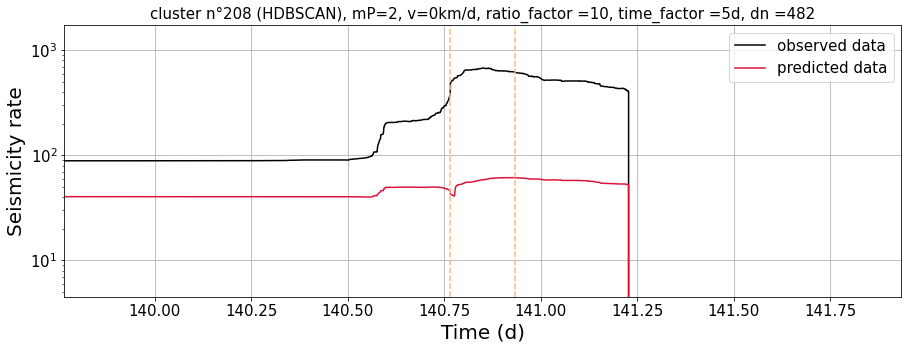

1.0 148 292


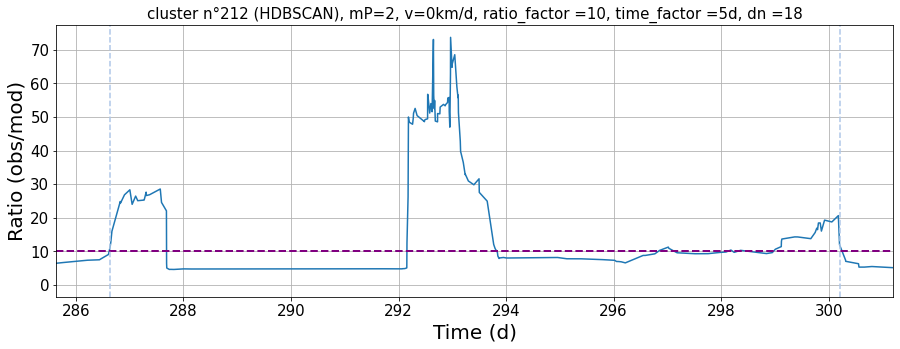

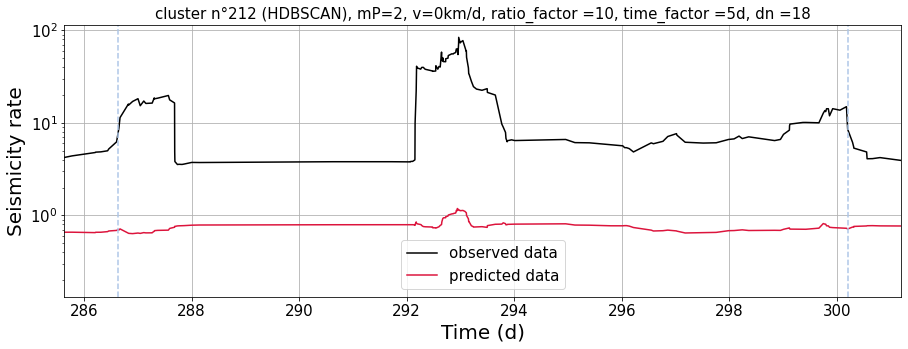

1.0 293 635


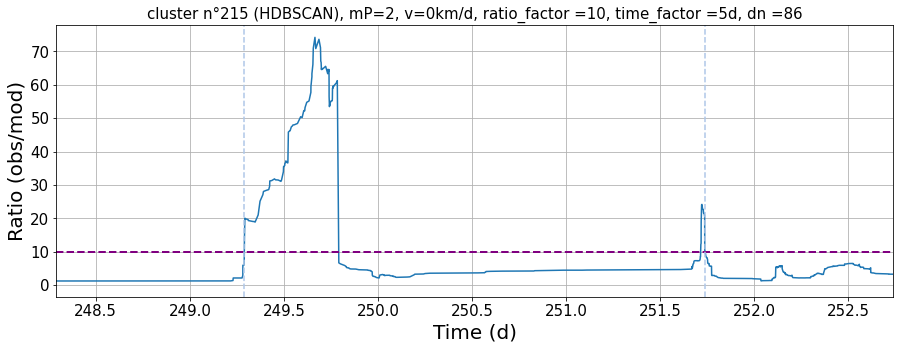

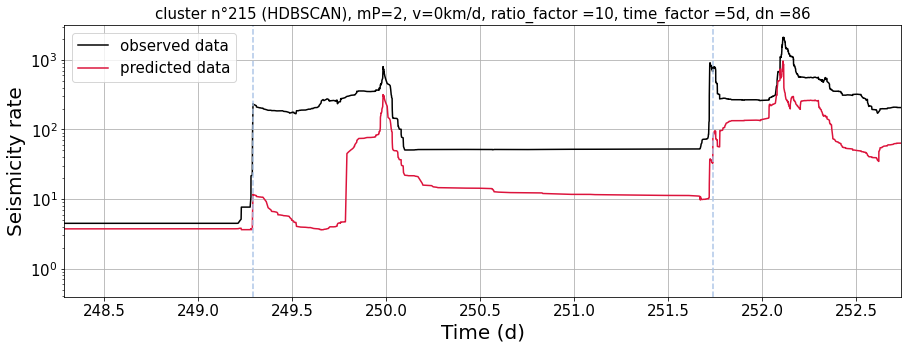

1.0 343 533


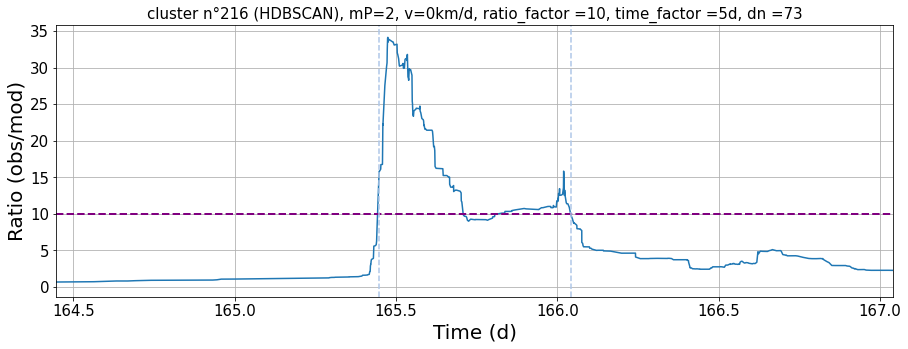

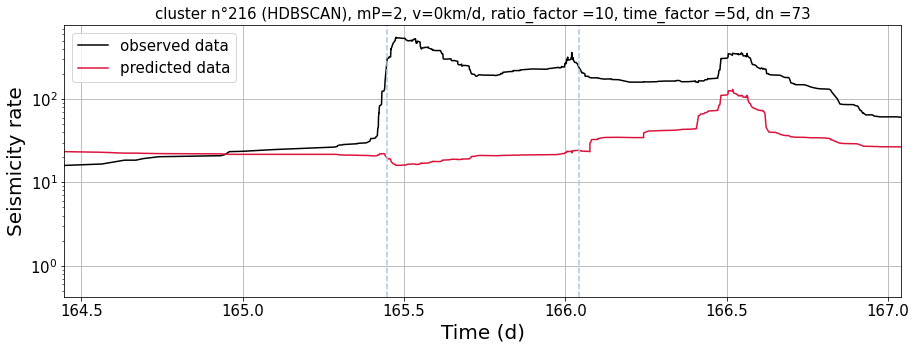

1.0 4454 4820
2.0 6404 6733


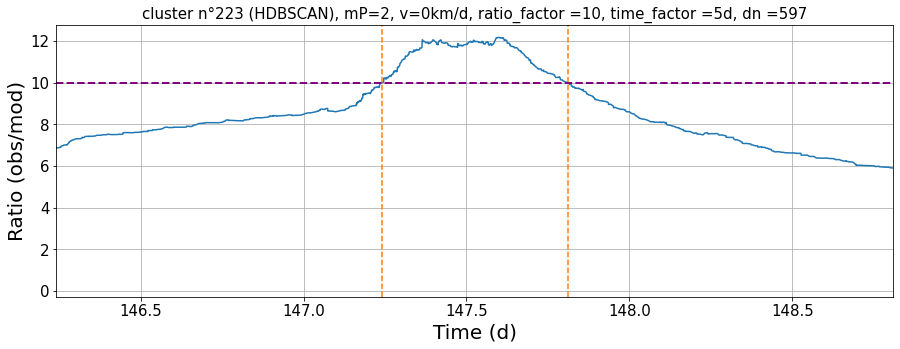

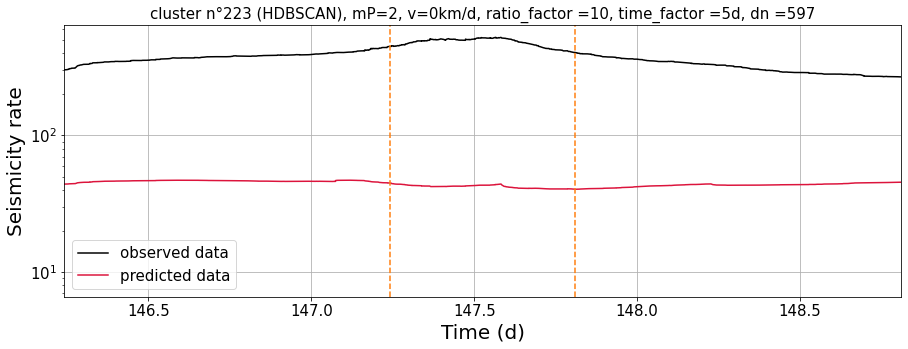

1.0 4454 4820
2.0 6404 6733


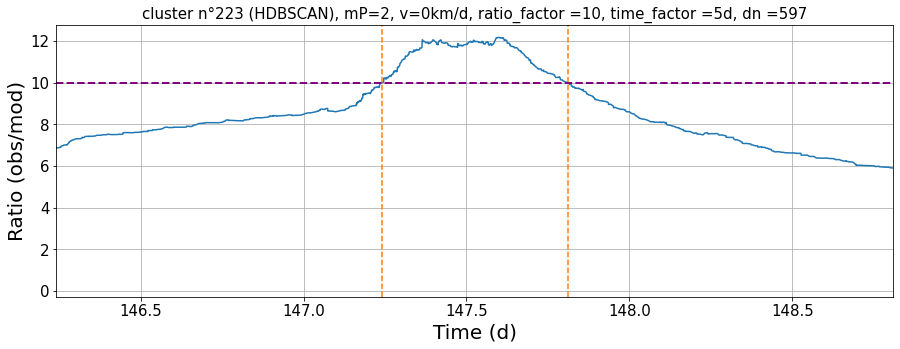

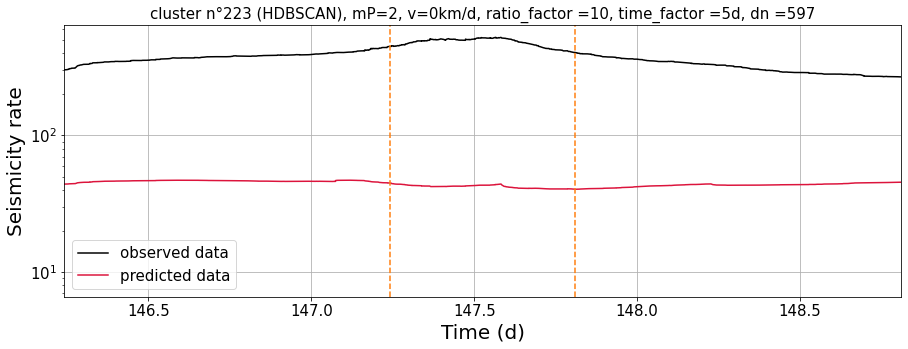

1.0 4454 4820
2.0 6404 6733


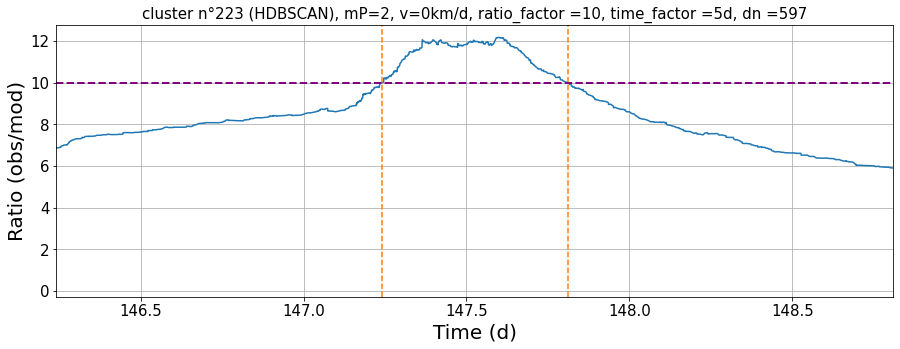

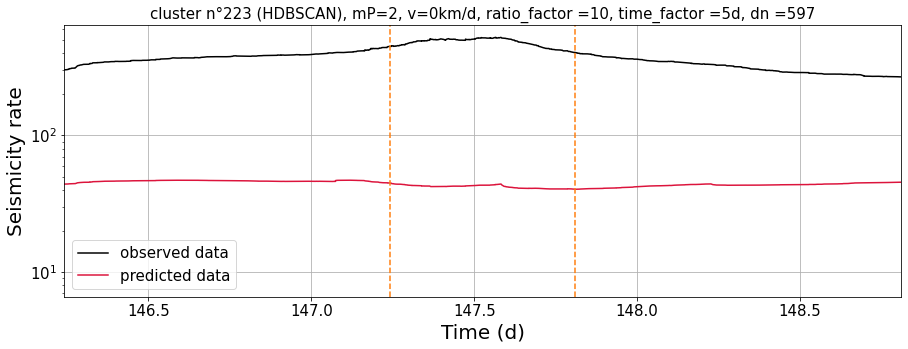

1.0 4454 4820
2.0 6404 6733


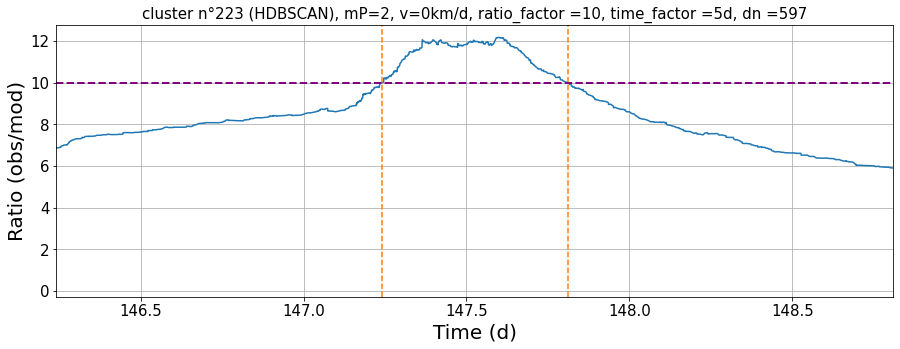

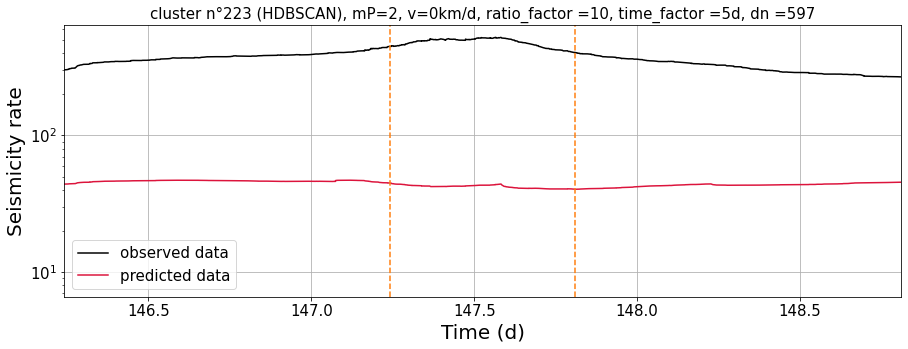

1.0 34 95


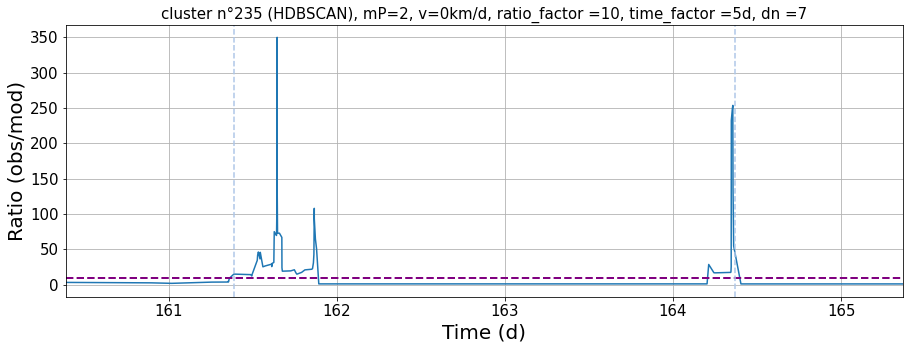

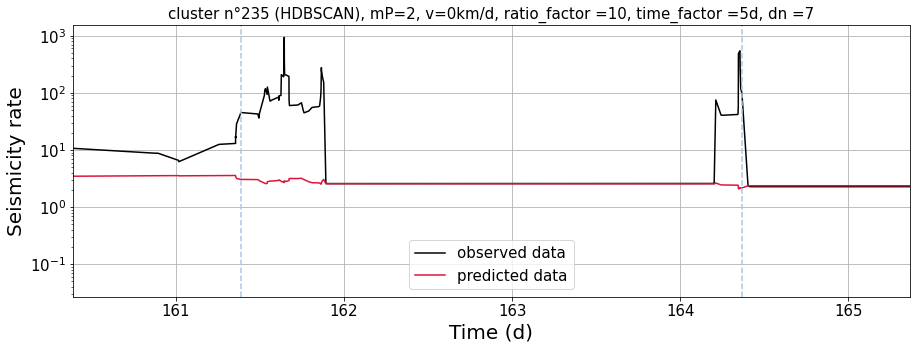

2.0 21 75


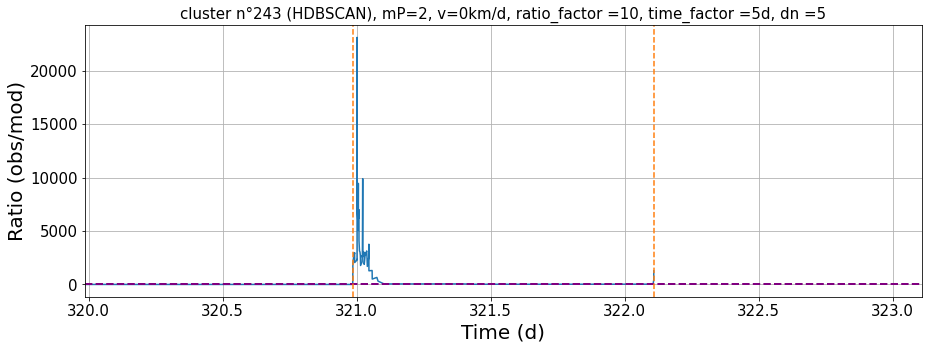

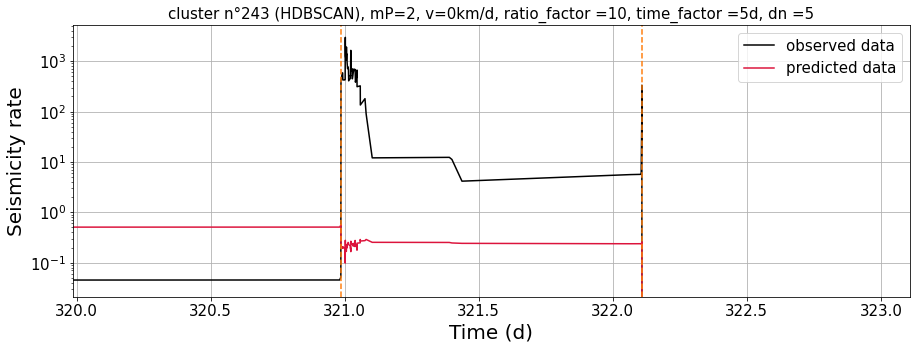

1.0 64 140


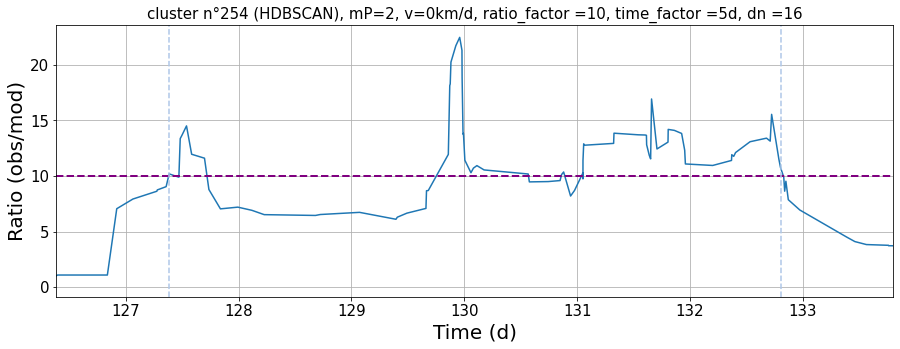

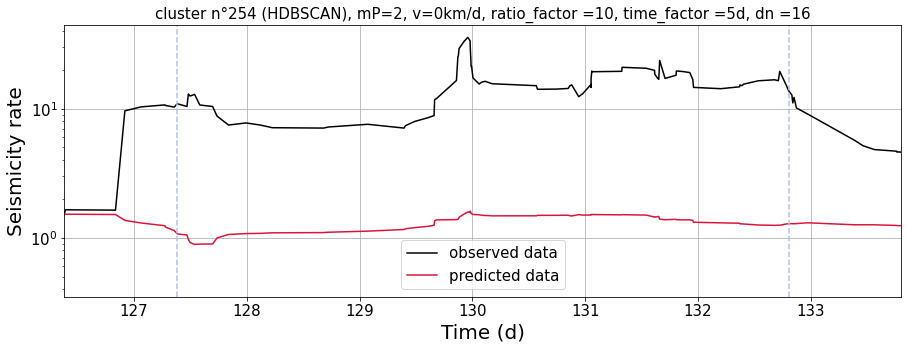

1.0 11 210


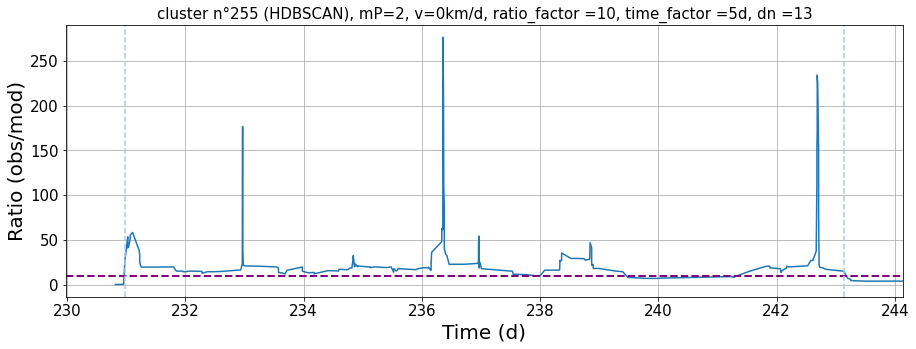

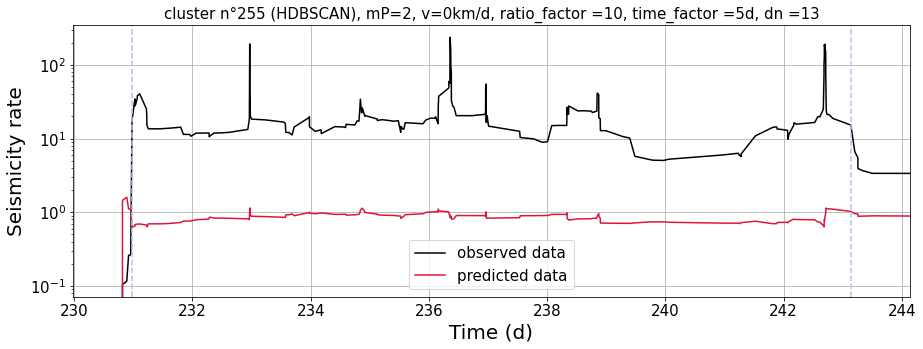

1.0 7 163


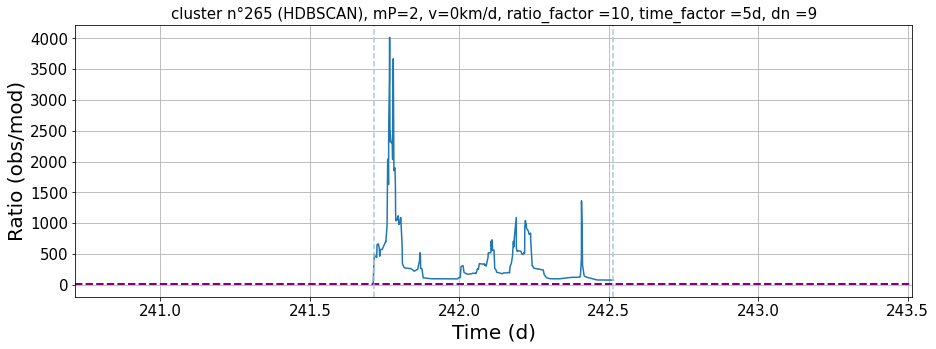

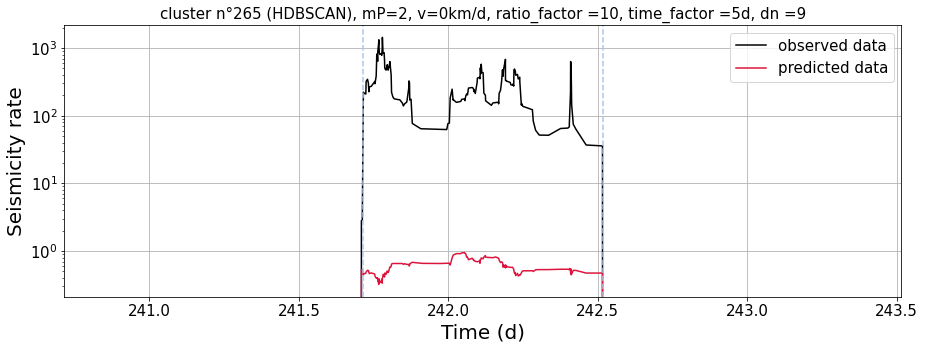

1.0 2 54


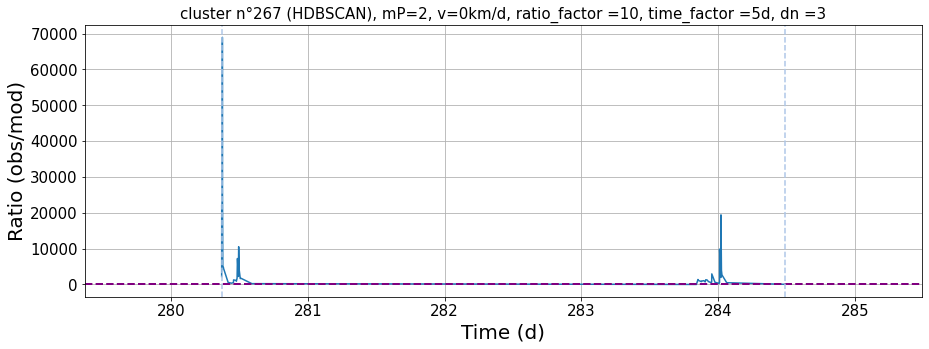

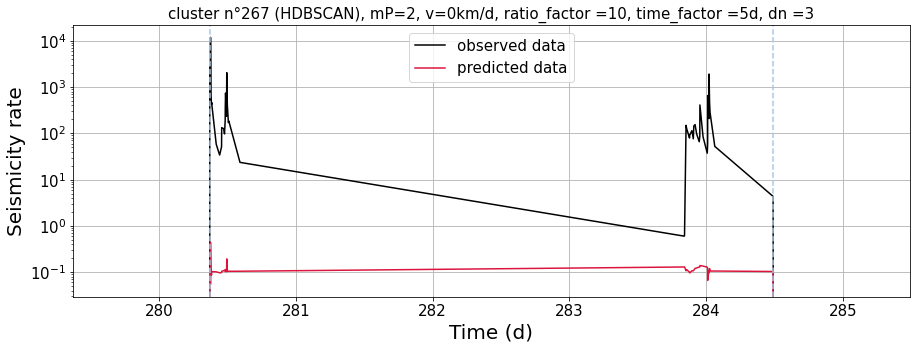

1.0 4 68


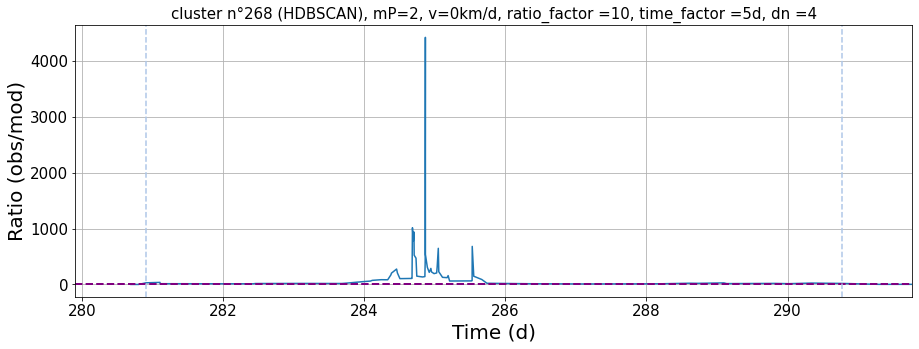

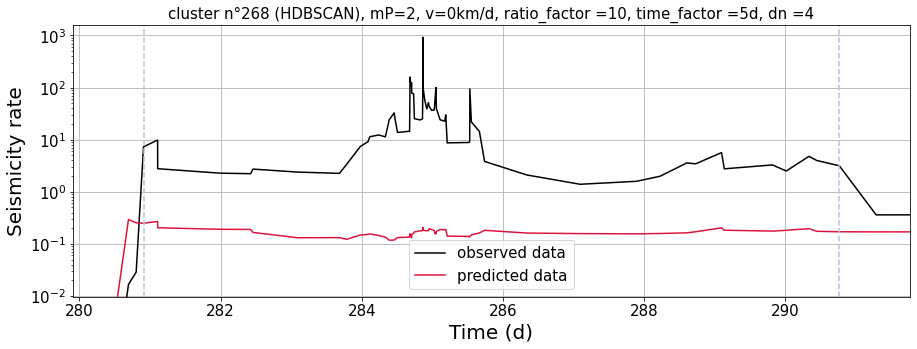

1.0 2 70


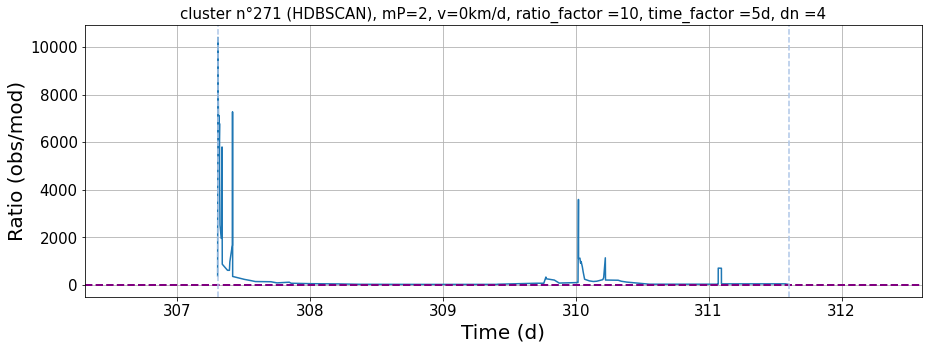

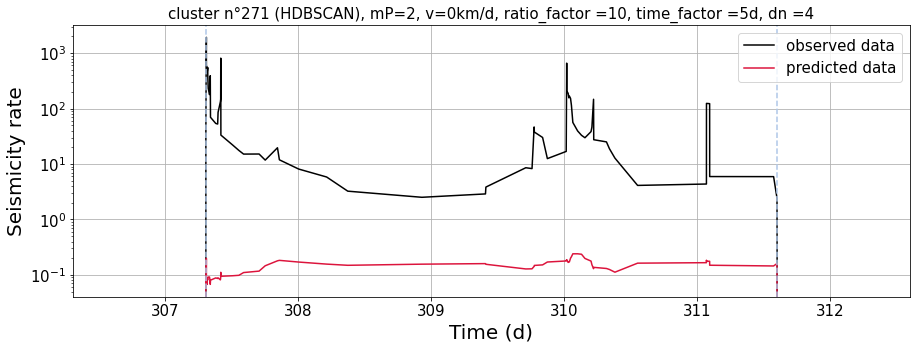

1.0 4 122


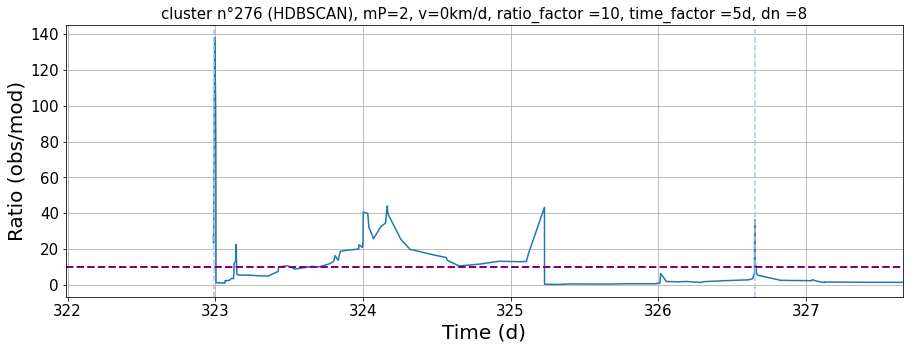

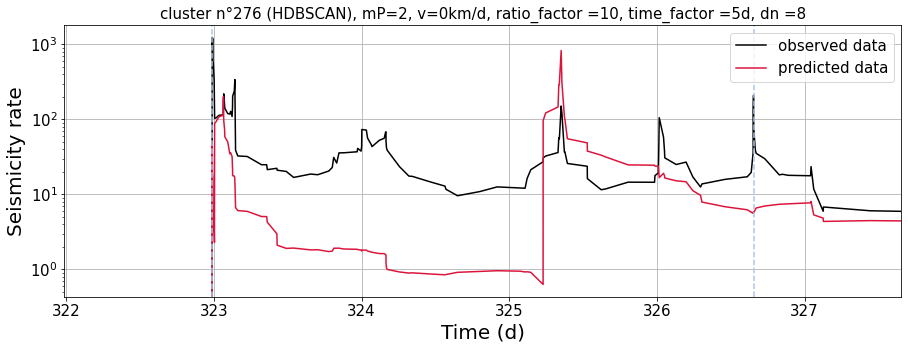

count_step2 = 51
count_step1 = 62
CPU times: user 2min 58s, sys: 488 ms, total: 2min 59s
Wall time: 3min 2s


In [17]:
%%time 

###################CHECK SWARMS###################

#Organizing files:
#
path = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/output_dbscan_v0_d03_n50_every1/"
#
path_coords = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/dbscan_parameter_files_v0_d03_n50_every1/"
#path = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every5_clusters/output_dbscan_v0_d03_n50_every5/"
#path_coords = "/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every5_clusters/dbscan_parameter_files_v0_d03_n50_every5/"


count = 0
get_cluster_num = []

##for final table of swarms saved:
all_t1_swarms = []
all_t2_swarms = []
all_x1_swarms = []
all_x2_swarms = []
all_y1_swarms = []
all_y2_swarms = []
all_z1_swarms = []
all_z2_swarms = []

all_select_ratio_swarms = []

##Parameter:
ratio_factor = 10
time_factor = 5 ##d
min_cluster_size = 50 ##same as when running DBSCAN

count_step1 = 0

#for num_cluster_HDBSCAN in get_cluster_num_:
#
for num_cluster_HDBSCAN in range(1, df0["v0_n50_d0_3"].max()+1) :
   
    df2 = np_to_pd_3(path+"dbscan_clust"+str(num_cluster_HDBSCAN)+".dat")

    ###We are interest in the cumulative seismic events first:
    df00 = df2[df2.ind == 1]
    df1 = np.cumsum(df00.ind)

    ###Compute seismicty rate: 
    dn = int(np.ceil(len(df00)*5/100)) ##smooth windown ##taking 5% of cluster's data

    ###Observed data: 
    dff = df1
    EQ1_rate = seismicity_rate2 (dn, df00, dff)

    ###The model data:
    dff = df00.lam
    EQ2_rate = seismicity_rate2 (dn, df00, dff)

    ##obs/mod:
    ratio = EQ1_rate/EQ2_rate

    arg = np.argwhere((ratio >= ratio_factor)&(ratio != np.inf))
    arg = arg.T[0]

    if len(arg) >= min_cluster_size:

        ##time data:
        tps = df00.t.values

        ##label of swarms:
        label = np.zeros(len(arg))

        ##diff in time for only data which ratio >= ratio_factor:
        dt = tps[arg[1:]] - tps[arg[:-1]]
        max_dt = np.max(dt)

        ##Find the beginning of the swarms:
        arg2 = np.argwhere(dt >= time_factor)        
        arg2 = arg2.T[0] +1
        label[arg2] += 1
        label[0] = 1

        ##Determine swarms:
        cumsum = np.cumsum(label)

        ##create a table:
        data = {"t":tps, "lam_mod":EQ2_rate, "lam_obs":EQ1_rate, "ratio":ratio, "label": np.zeros(len(ratio))-1}
        df_swarms = pd.DataFrame(data)

        ##put the right label of swarms:
        df_swarms.label.iloc[arg] = cumsum

        ##select swarms name:
        swarms_label = np.unique(df_swarms.label)[1:]

        for i in swarms_label:
            select_swarms = df_swarms[df_swarms.label == i]
            swarm_size = len(select_swarms)
            
            count_step1 +=1

            if (swarm_size >= min_cluster_size) == True:

                count += 1

                ###Get spatial coords:
                param_file_name = path_coords+"dbscan_cluster"+str(num_cluster_HDBSCAN)
                with open(param_file_name) as f:
                    lines = f.readlines()
                    lines_coords = lines[2].split()
                    x1, x2, y1, y2, z1, z2 = float(lines_coords[0]), float(lines_coords[1]), float(lines_coords[2]), float(lines_coords[3]) , float(lines_coords[4]), float(lines_coords[5]) 
                    ##x:lat(°), y:lon(°), z:z(km)

                all_x1_swarms.append(x1) ##deg 
                all_x2_swarms.append(x2) ##deg
                all_y1_swarms.append(y1) ##deg
                all_y2_swarms.append(y2) ##deg
                all_z1_swarms.append(z1) ##km
                all_z2_swarms.append(z2) ##km

                get_cluster_num.append(num_cluster_HDBSCAN)

                all_t1_swarms.append(select_swarms.t.min()) ##d
                all_t2_swarms.append(select_swarms.t.max()) ##d

                ##Plot ratio:
                plt.figure(figsize=(15,5))
                plt.plot(df00.t,ratio)
                plt.xlabel("Time (d)", fontsize=20)
                plt.ylabel("Ratio (obs/mod)", fontsize=20)
                plt.axhline(y=ratio_factor, linewidth=2, color='purple', ls = '--')
                for j in swarms_label:
                    each_swarms = df_swarms[df_swarms.label == j]
                    swarm_size = len(each_swarms)

                    if swarm_size >= min_cluster_size:
                        plt.axvline(each_swarms.t.min(), c=cmap[int(j)], linestyle='--')
                        plt.axvline(each_swarms.t.max(), c=cmap[int(j)], linestyle='--')
                        plt.xlim(each_swarms.t.min()-1, each_swarms.t.max()+1)
                        
                        ##get ratio data:
                        select_ind = df_swarms.t[(df_swarms.t >=each_swarms.t.min()) & (df_swarms.t <= each_swarms.t.max())]
                        select_ind1 = select_ind.index[0]
                        select_ind2 = select_ind.index[-1]
                        select_ratio = ratio[select_ind1:select_ind2]
                        all_select_ratio_swarms.append(select_ratio)
                        print(j, select_ind1, select_ind2)
                        
                plt.title('cluster n°'+str(num_cluster_HDBSCAN)+' (HDBSCAN), mP=2, v=0km/d, ratio_factor ='+str(ratio_factor)+", time_factor =" +str(time_factor)+"d, dn ="+str(dn), fontsize=15)
                plt.xticks(fontsize=15,)
                plt.yticks(fontsize=15,)
                plt.grid(True)
                plt.savefig("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/ratio_for_clusters/dbscan"+str(num_cluster_HDBSCAN)+"_zoom.png")
                plt.show()

                ###Plot of swarms:
                plt.figure(figsize=(15,5))
                plt.plot(df_swarms.t, EQ1_rate, '-k', label = "observed data")
                plt.plot(df_swarms.t, EQ2_rate, c = "crimson", label = "predicted data")

                for j in swarms_label:
                    each_swarms = df_swarms[df_swarms.label == j]
                    swarm_size = len(each_swarms)

                    if swarm_size >= min_cluster_size:
                        
                        plt.axvline(each_swarms.t.min(), c=cmap[int(j)], linestyle='--')
                        plt.axvline(each_swarms.t.max(), c=cmap[int(j)], linestyle='--')
                        plt.xlim(each_swarms.t.min()-1, each_swarms.t.max()+1)
                        
                plt.title('cluster n°'+str(num_cluster_HDBSCAN)+' (HDBSCAN), mP=2, v=0km/d, ratio_factor ='+str(ratio_factor)+", time_factor =" +str(time_factor)+"d, dn ="+str(dn), fontsize=15)
                plt.xlabel("Time (d)", fontsize=20)
                plt.ylabel("Seismicity rate", fontsize=20)
                plt.yscale("log")
                plt.xticks(fontsize=15,)
                plt.yticks(fontsize=15,)
                plt.grid(True)
                plt.legend(fontsize=15)
                plt.savefig("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/SR_for_clusters/dbscan"+str(num_cluster_HDBSCAN)+"_zoom.png")
                plt.show()

##For paper: check step3 in methodo:
print("count_step2 =", count)
print("count_step1 =", count_step1)

##create final table of swarms:a
data = {"t1":all_t1_swarms, "t2":all_t2_swarms,
       "x1":all_x1_swarms, "x2":all_x2_swarms,
       "y1":all_y1_swarms, "y2":all_y2_swarms,
       "z1":all_z1_swarms, "z2":all_z2_swarms,
       "num_EQ":get_cluster_num}

df_final_swarms = pd.DataFrame(data)

In [7]:
len(all_select_ratio_swarms) ##y a les doublons/triplons == 10 d'où 51 au lieu des 41
#all_select_ratio_swarms

51

In [ ]:
all_mean = []
all_Q2 = []
all_Q3 = []
all_min = []
all_max = []

#for i in range(0, 4):
#
for i in range(0, len(all_select_ratio_swarms)):
    a = all_select_ratio_swarms[i]
    a_mean = np.mean(a)
    a_Q2 = np.percentile(a, 50)  ##median
    a_Q3 = np.percentile(a, 75)  
    a_min = np.min(a)
    a_max = np.max(a)
    all_mean.append(a_mean)
    all_Q2.append(a_Q2)
    all_Q3.append(a_Q3)
    all_min.append(a_min)
    all_max.append(a_max)
#     a_max = np.max(a)
#     print("min:", a_min, "max:", a_max)
#     print("mean:", a_mean)
#     print("median:", a_Q2)
#     print("Q3", a_Q3)
#     print("")

df_ratio = pd.DataFrame({"mean":all_mean, "Q2":all_Q2, "Q3":all_Q3, "min":all_min, "max":all_max})
df_ratio

In [ ]:
##On retire les 10 doublons/triplons:
df_ratio = df_ratio.drop_duplicates(subset=["mean", "Q2", "Q3", "min", "max"], keep='first', inplace=False, ignore_index=False)
print(len(df_ratio))
df_ratio.index = np.arange(0, len(df_ratio))

df_ratio

In [ ]:
##On crée un datframe qui prend aussi les valeurs de ratio:
df_final_swarms_ratio = pd.concat([df_final_swarms, df_ratio], axis=1)

# df_final_swarms_ratio = df_final_swarms_ratio.sort_values("t1")
# df_final_swarms_ratio.index = np.arange(1, len(df_final_swarms_ratio)+1)

# df_final_swarms_ratio.to_csv("/home/xianglo/Bureau/DATA_AMATRICE/DBSCAN_David/new_all_run_files_for_etas/v0_d03_n50_every1_clusters/df_final_swarms_of_v0_d03_n50_every1_with_ratio.csv", index = False)

df_final_swarms_ratio

In [ ]:
df_final_swarms = df_final_swarms.sort_values("t1")
df_final_swarms.index = np.arange(1, len(df_final_swarms)+1)

#df_final_swarms.to_csv("v0_d03_n50_every5_clusters/df_final_swarms_of_v0_d03_n50_every1.csv", index = False)

df_final_swarms